In [1]:
import sys
sys.path.insert(0,'../')
import matplotlib.pyplot as plt
from spectrum import *
from series import *
from spectrum import *
from tools import *

#### Spectrum

{'x': None, 'fit_function': 'voigt_profile_plus_linear_function', 'lambda0_guess': 885, 'delta_lambda': 2, 'sigma_guess': 0.01, 'gamma_guess': 0.01, 'slope_guess': 0.6148590947907769, 'intercept_guess': 403.2425277540566, 'x_min': 883.9989, 'x_max': 885.9875, 'lambda0': 885.0765336036917, 'a': 1012.4974662269922, 'sigma': 0.12746325678142442, 'gamma': 0.004911943270044813, 'slope': -38.19281187513348, 'intercept': 34792.75937108063, 'f_g': 0.3001530320738253, 'f_l': 0.009823886540089626, 'f_v': 0.30543680275138063, 'mu': 0.03169231626670099, 'q': 2897.7403038235902}


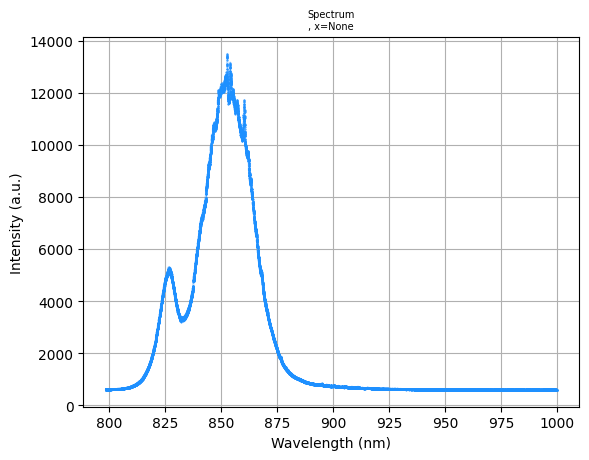

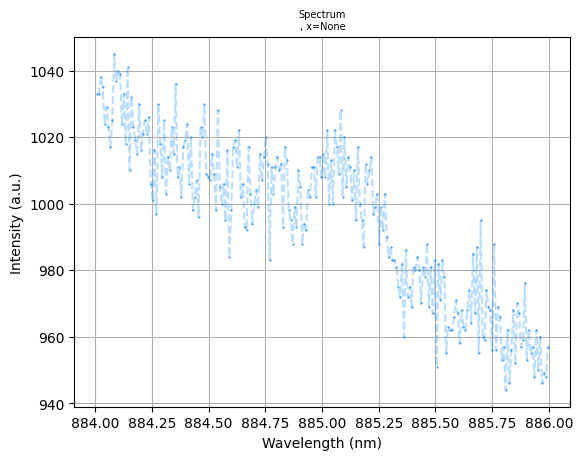

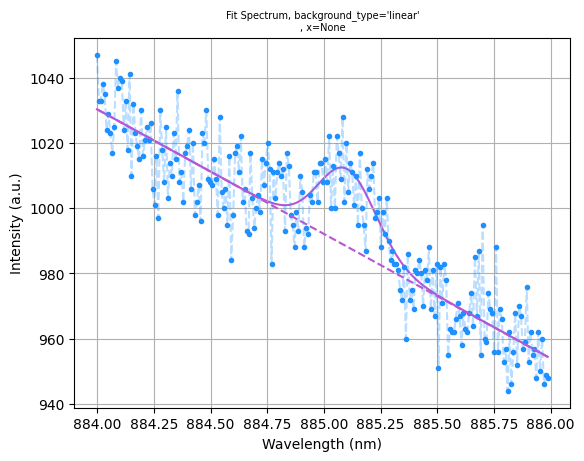

In [2]:
s = Spectrum('spectrum/stepandglue/')
s.plot()
s.plot(lambda_min = 884, lambda_max=886)
voigt_fit = s.fit(lambda0_guess=885, delta_lambda=2, plot=True)
print(voigt_fit)

#### Serie

n_frames : 30


/Users/lroche/Desktop/test/PEFT/demo/../spectrum.py:28: RuntimeWarning: invalid value encountered in divide
  return (a-b)*voigt_profile( x-x0, sigma, gamma)/voigt_profile(0, sigma, gamma) + b
/Users/lroche/Desktop/test/PEFT/demo/../spectrum.py:858: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Text(0, 0.5, 'Voigt profile linewidth [nm]')

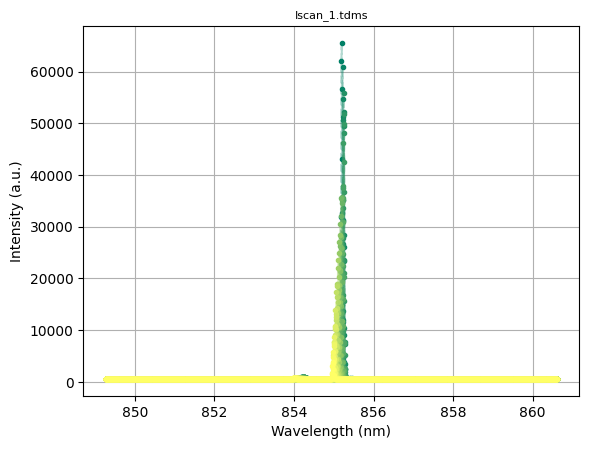

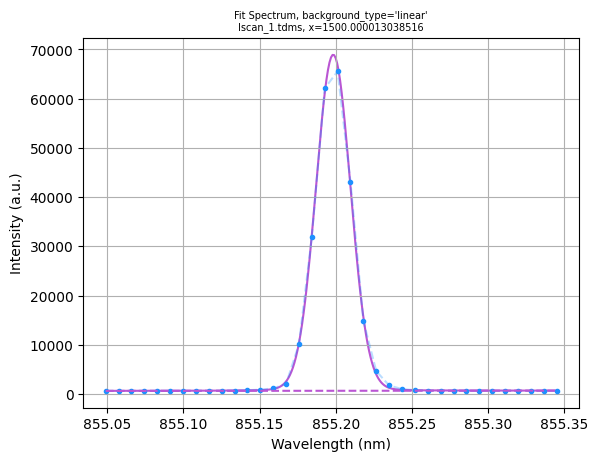

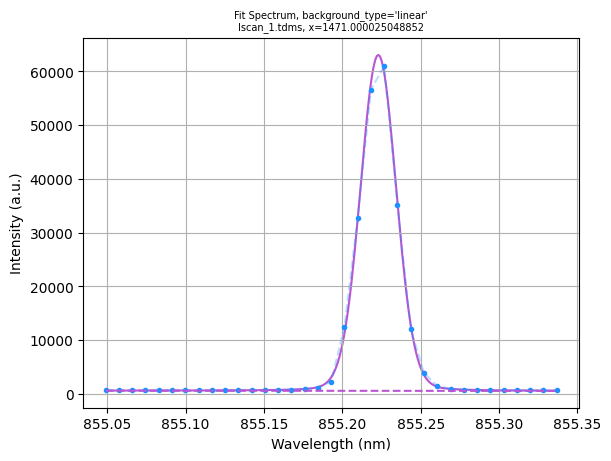

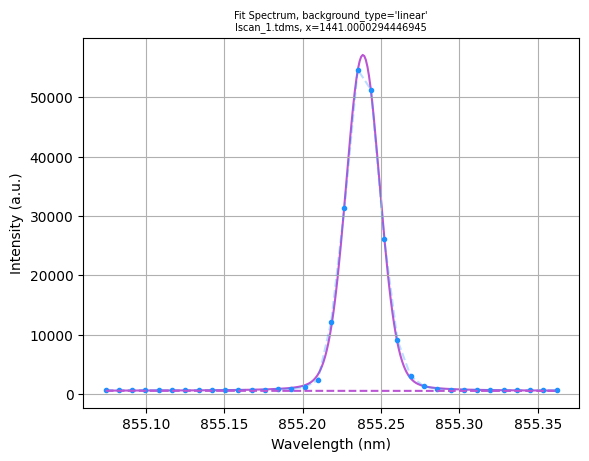

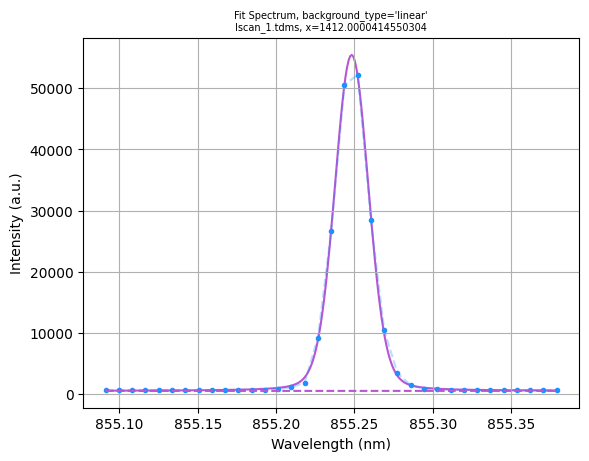

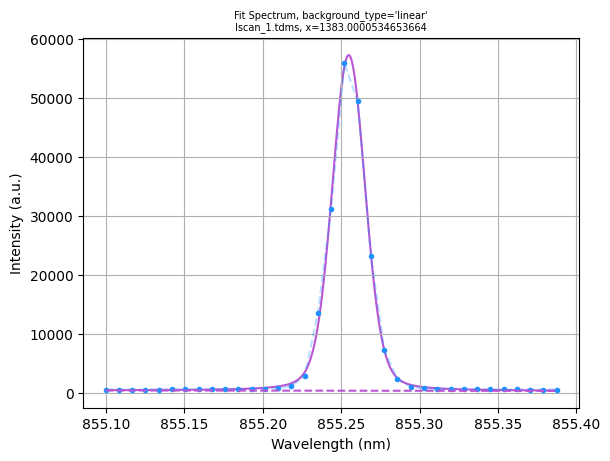

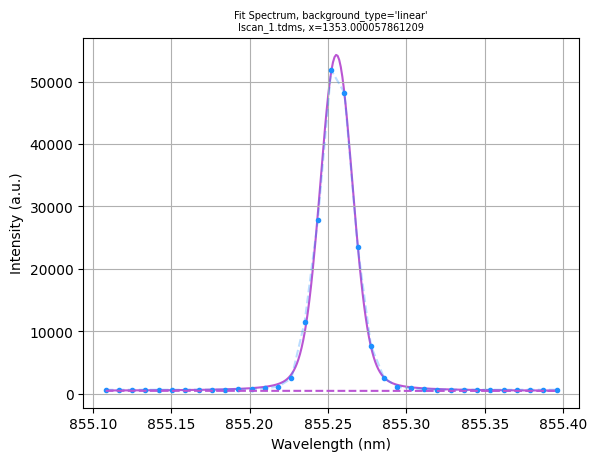

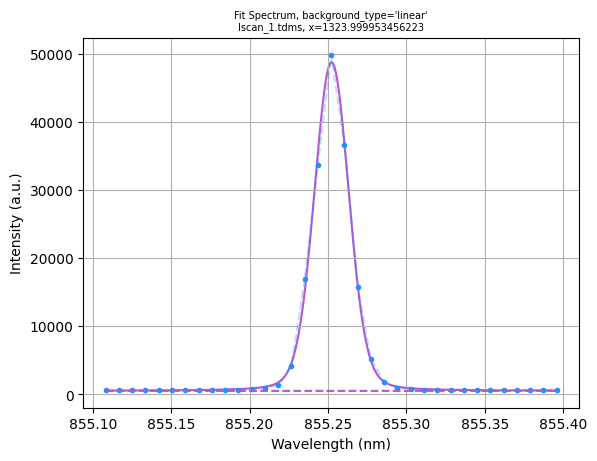

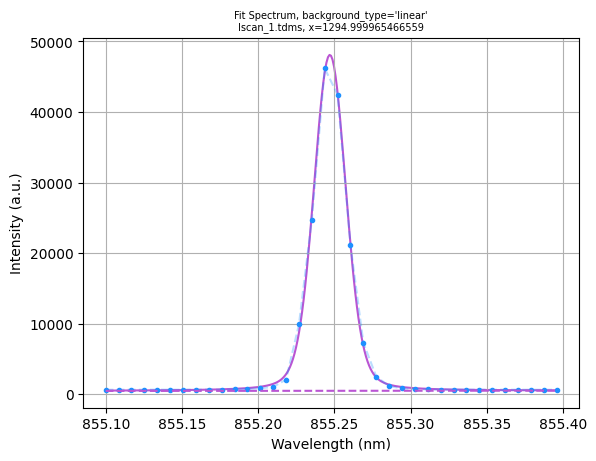

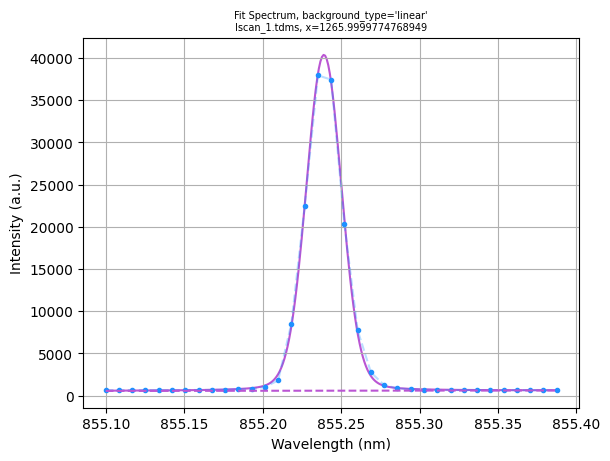

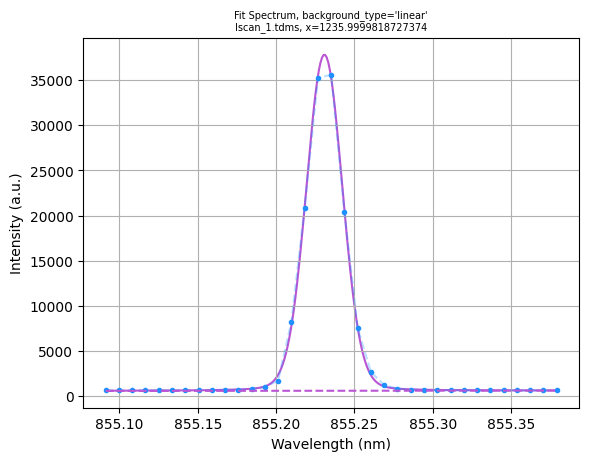

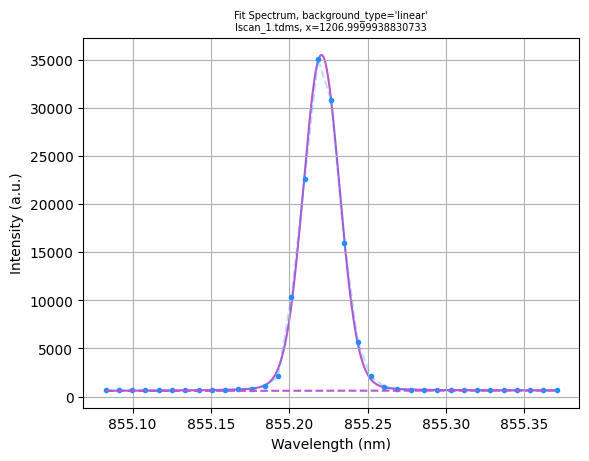

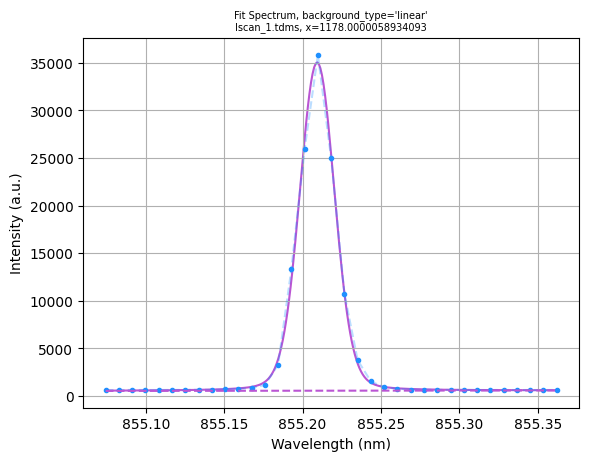

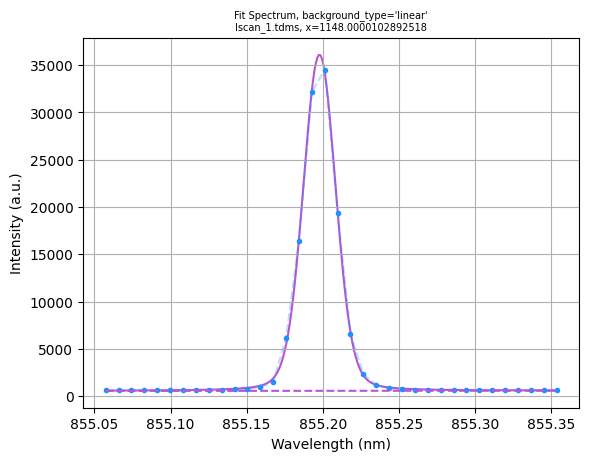

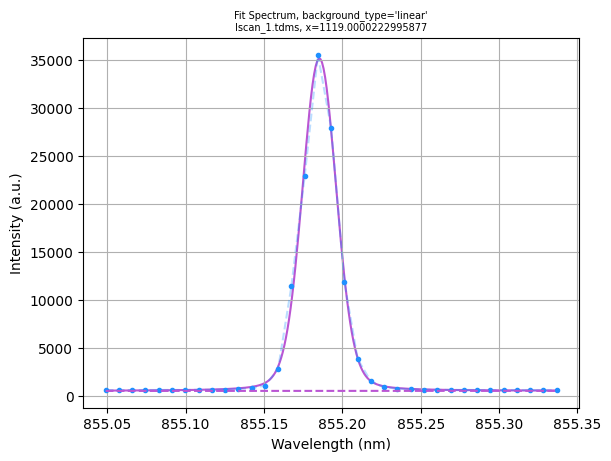

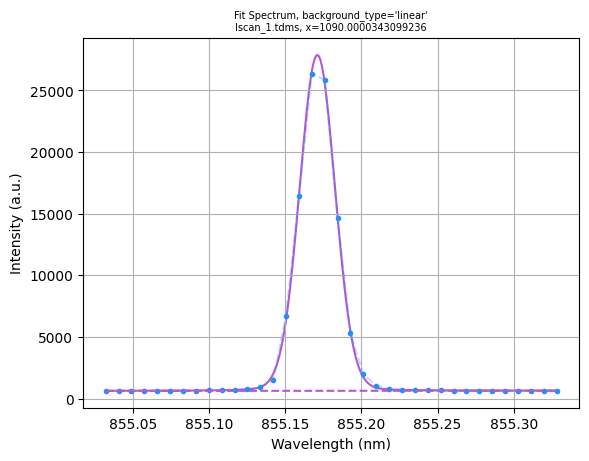

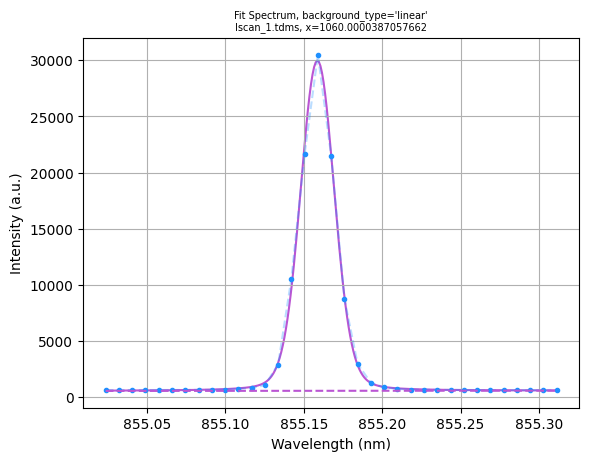

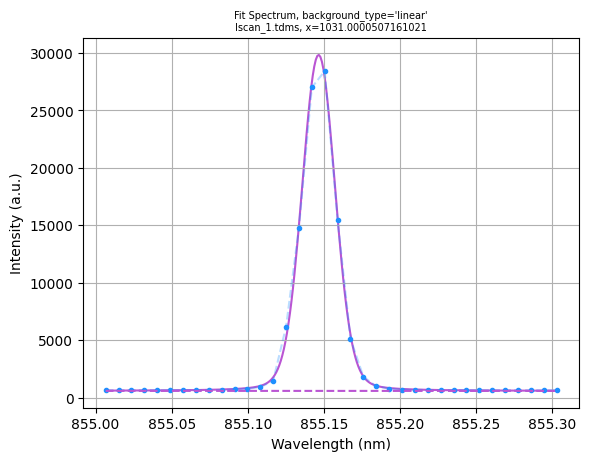

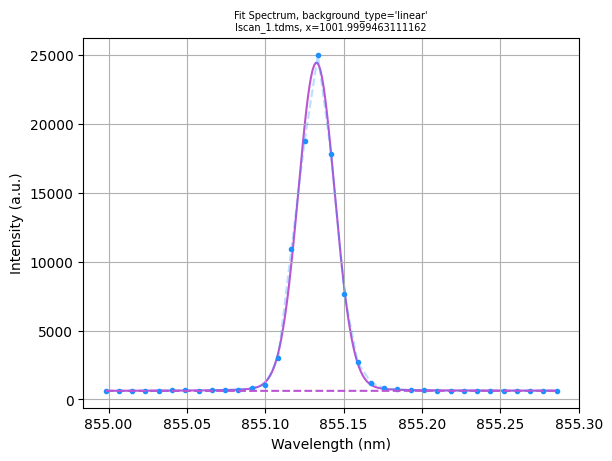

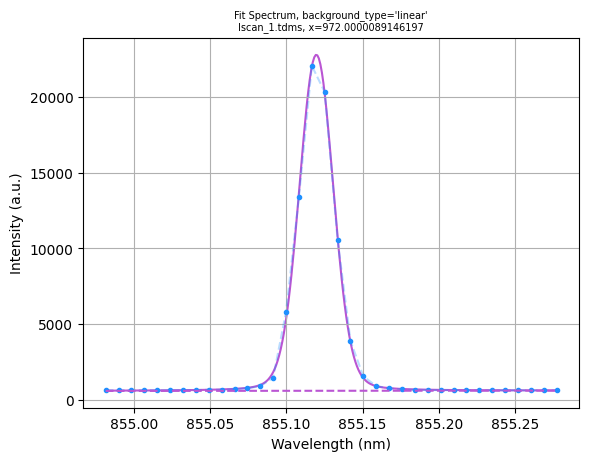

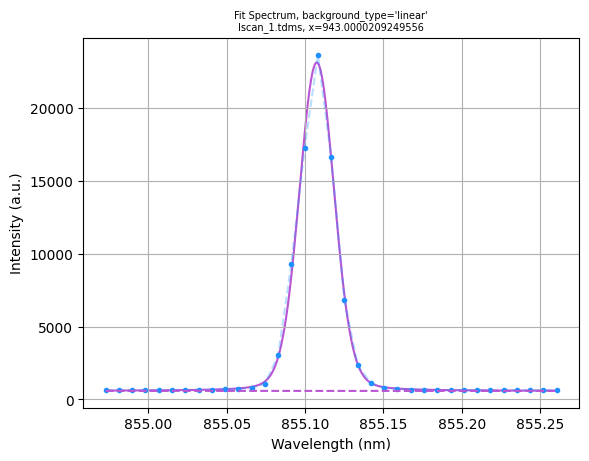

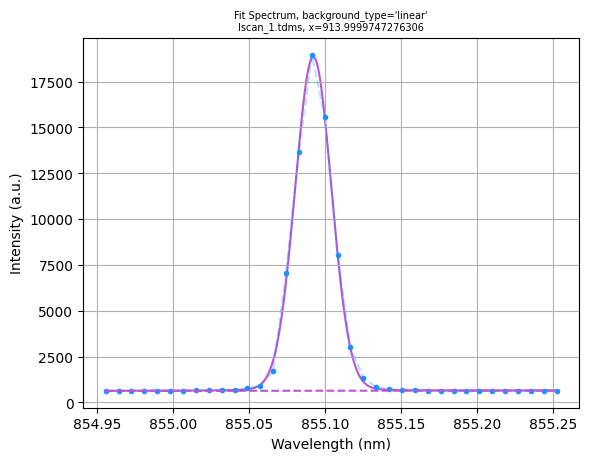

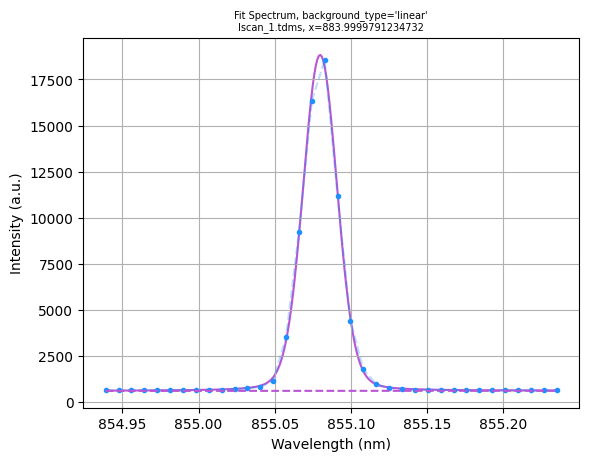

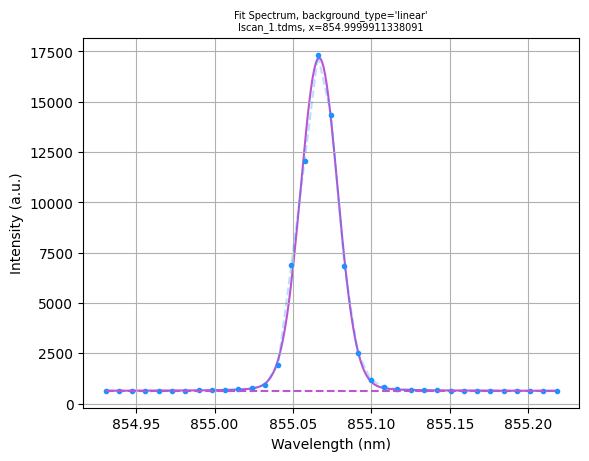

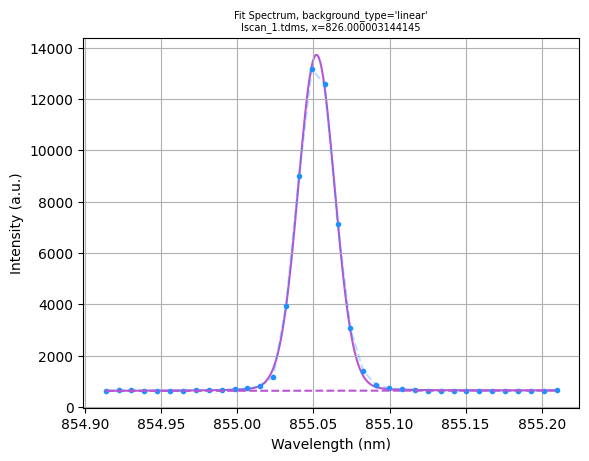

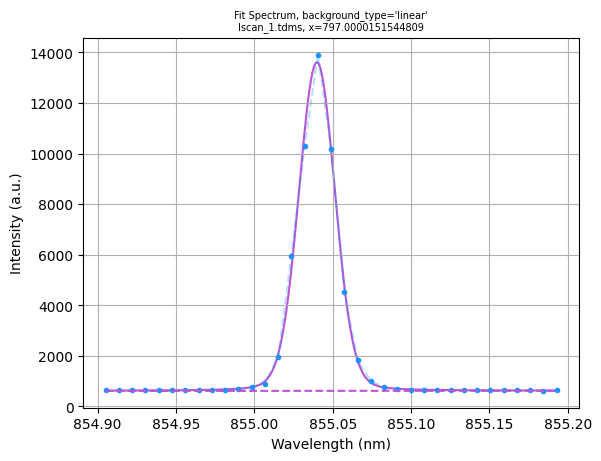

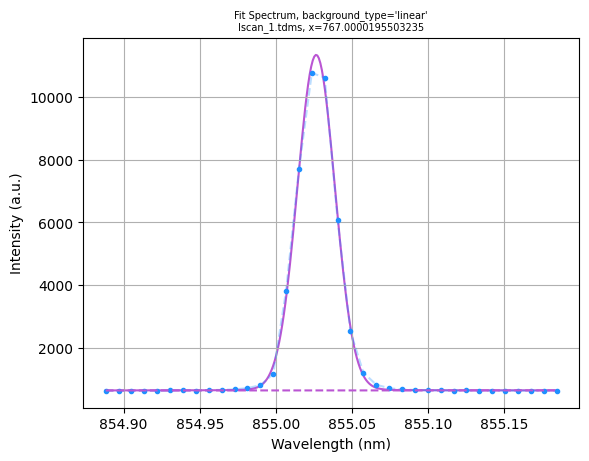

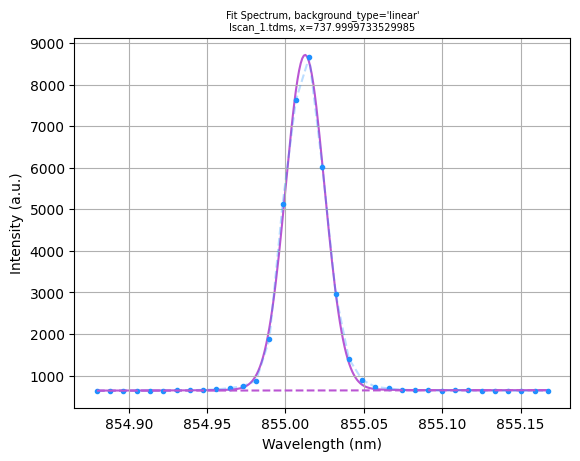

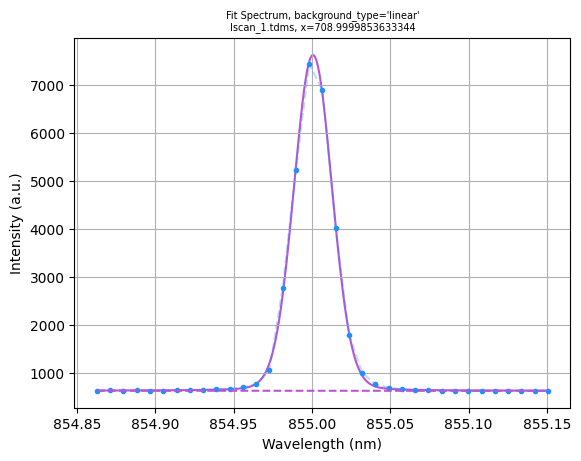

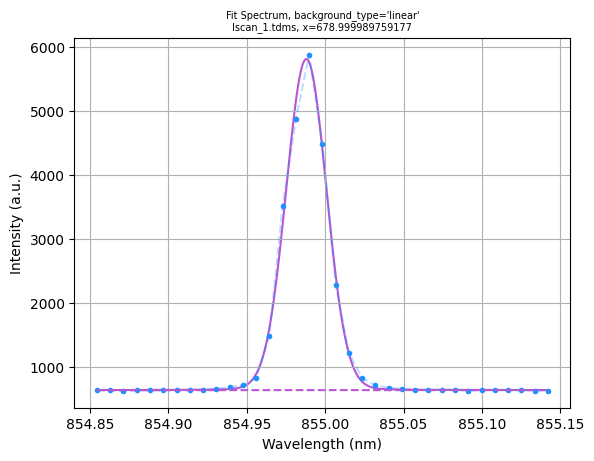

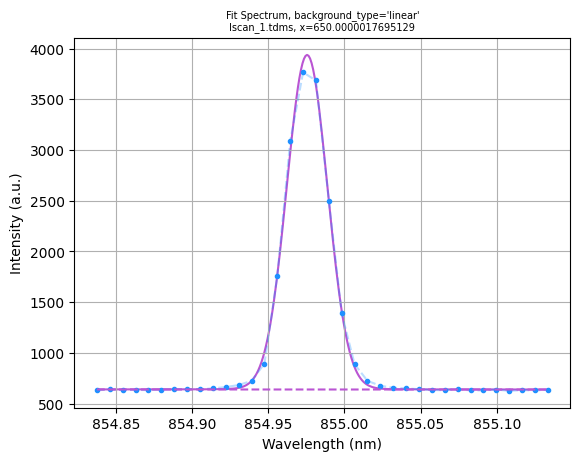

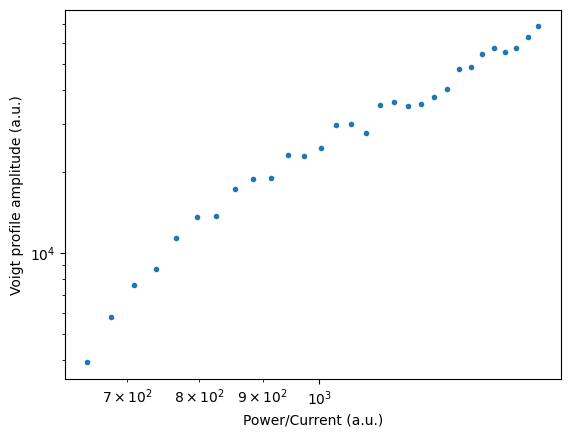

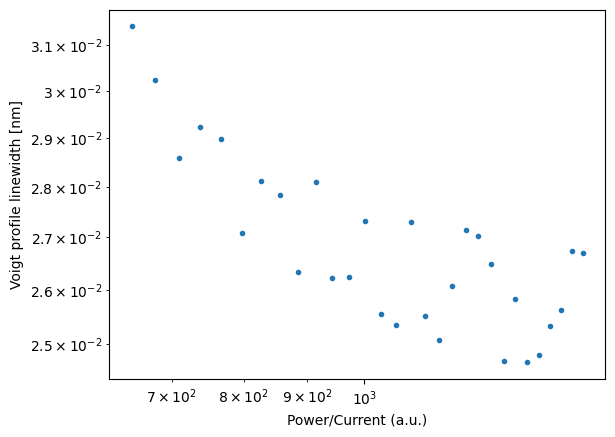

In [3]:
# load Series
FILEPATH = 'series/Iscan_1.tdms'
serie = Serie(FILEPATH)

# plot Series
serie.plot()
# print(serie.xs)
# # fit with Voigt profile 
plot_each_fit = True
serie.fit(lambda0_guess = 855.2, delta_lambda = .3, plot = plot_each_fit)

# plot fit results
df_fits = serie.get_fit_results()
plt.figure()
plt.loglog(df_fits['x'], df_fits['a'], '.')
plt.xlabel('Power/Current (a.u.)')
plt.ylabel('Voigt profile amplitude (a.u.)')

plt.figure()
plt.loglog(df_fits['x'], df_fits['f_v'], '.')
plt.xlabel('Power/Current (a.u.)')
plt.ylabel('Voigt profile linewidth [nm]')

#### Series

n_frames : 30
n_frames : 30
n_frames : 30
x = 1471.000025048852 : Voigt-profile fit failed : scipy.optimize.curve_fit() failed
(i, j) = (0, 1)


/Users/lroche/Desktop/test/PEFT/demo/../spectrum.py:28: RuntimeWarning: overflow encountered in multiply
  return (a-b)*voigt_profile( x-x0, sigma, gamma)/voigt_profile(0, sigma, gamma) + b
/Users/lroche/Desktop/test/PEFT/demo/../spectrum.py:28: RuntimeWarning: invalid value encountered in divide
  return (a-b)*voigt_profile( x-x0, sigma, gamma)/voigt_profile(0, sigma, gamma) + b
/Users/lroche/Desktop/test/PEFT/demo/../spectrum.py:858: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


x = 395.00001003034413 : Voigt-profile fit failed : scipy.optimize.curve_fit() failed
(i, j) = (2, 8)


Text(0, 0.5, 'Voigt profile linewidth [nm]')

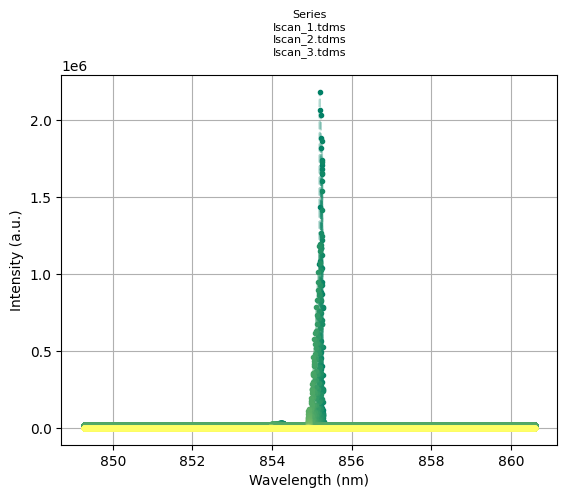

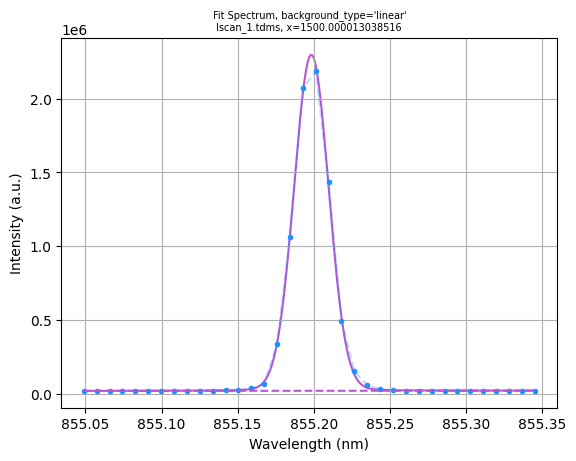

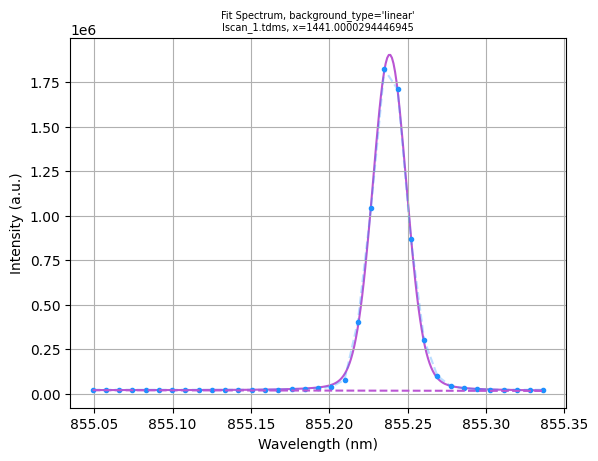

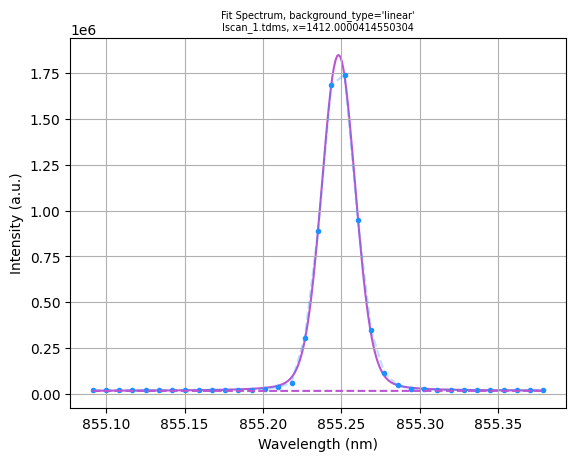

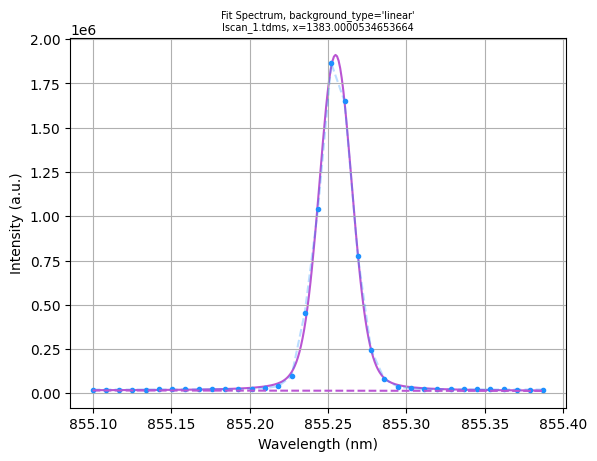

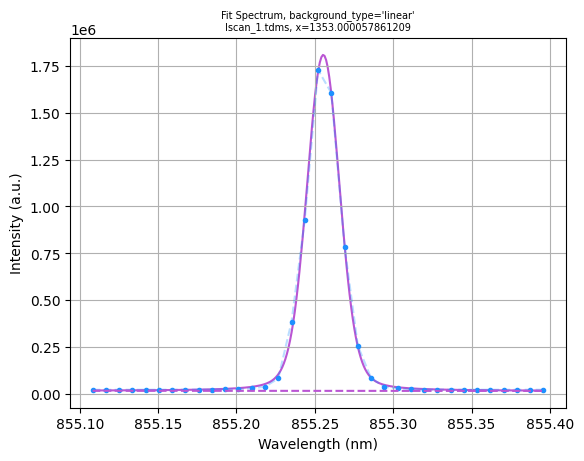

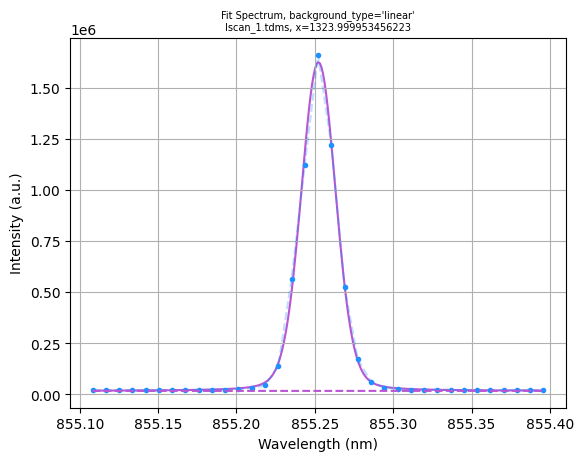

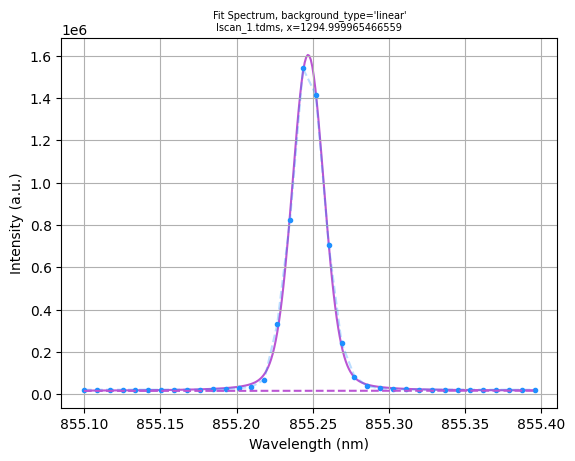

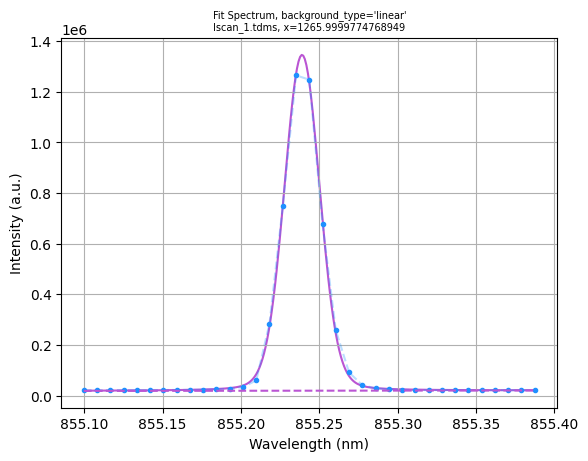

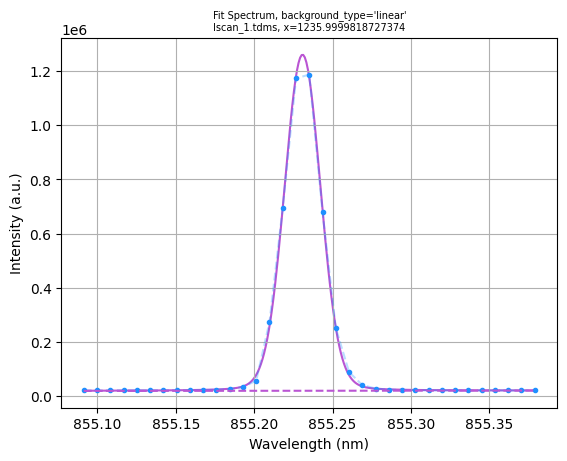

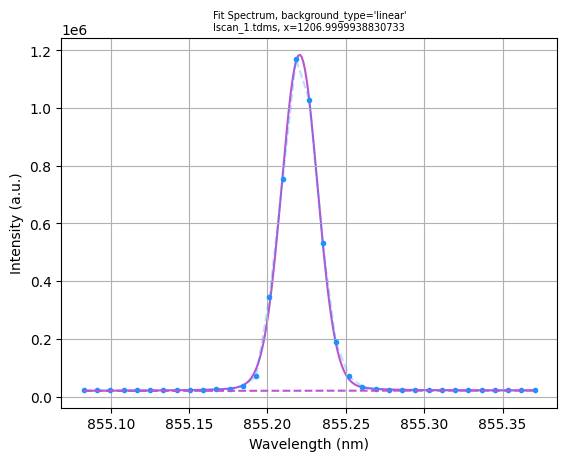

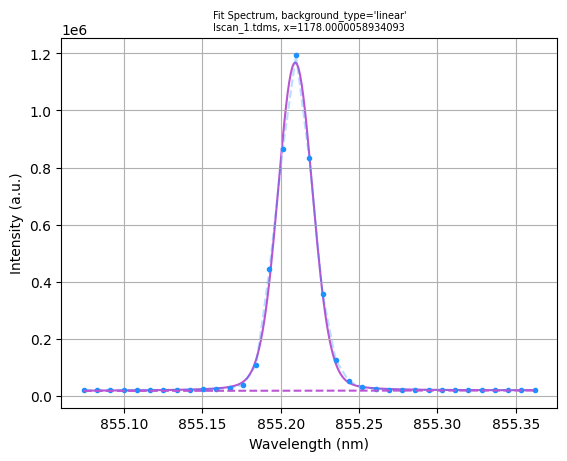

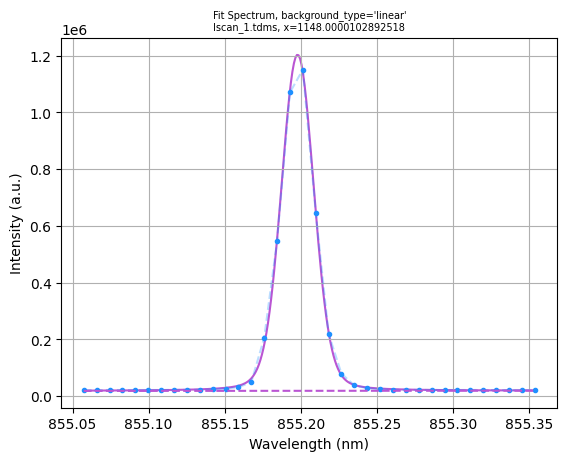

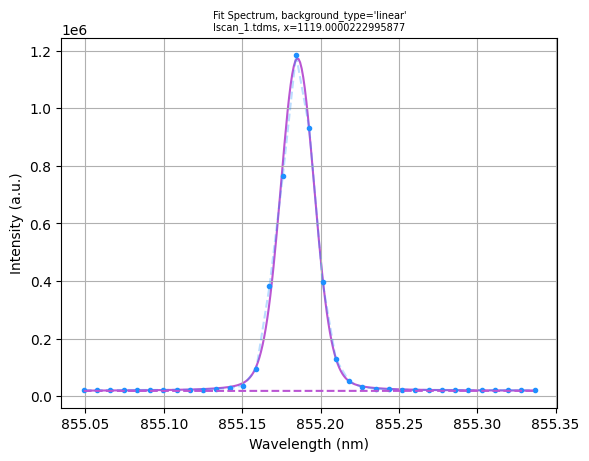

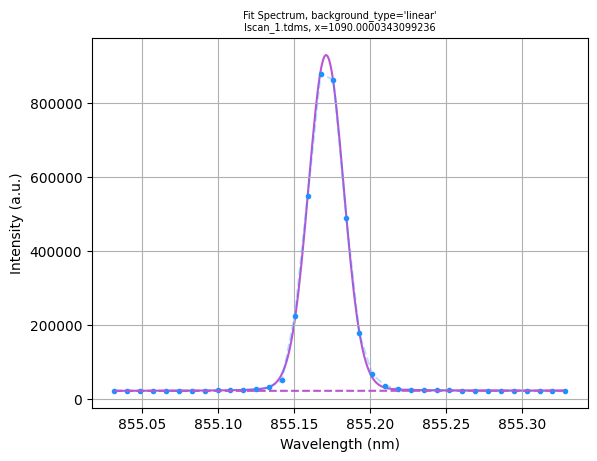

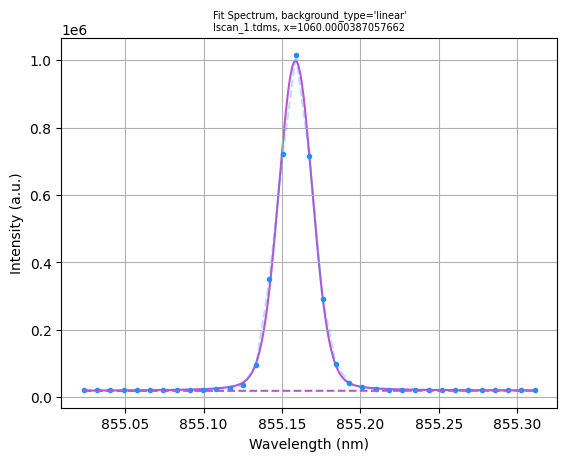

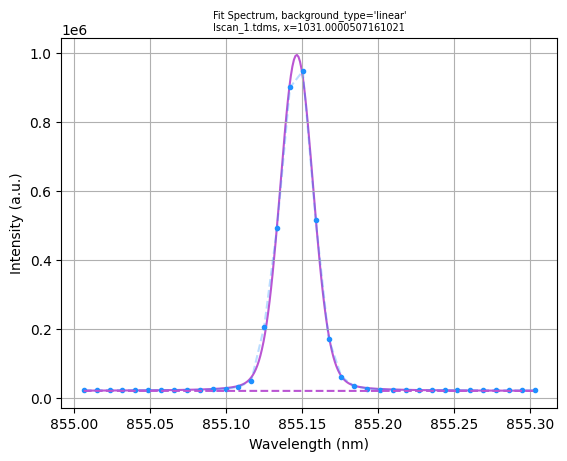

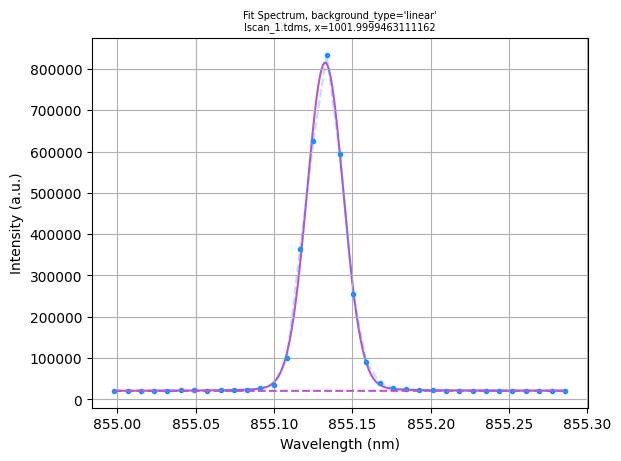

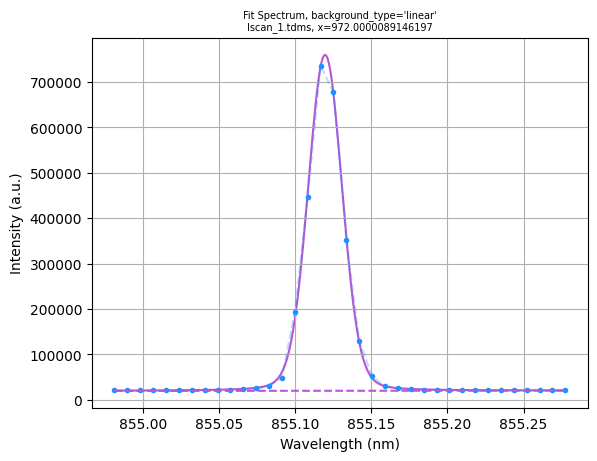

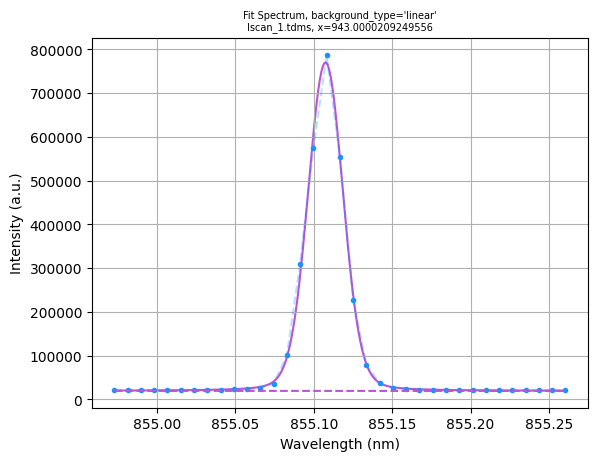

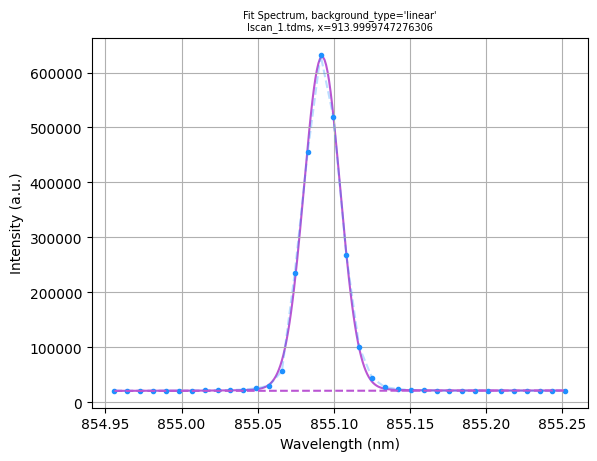

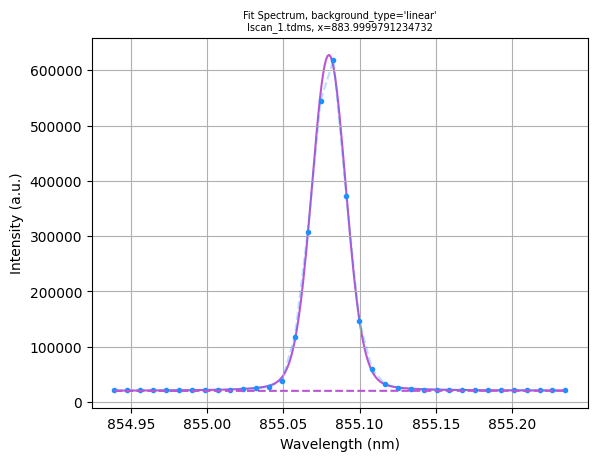

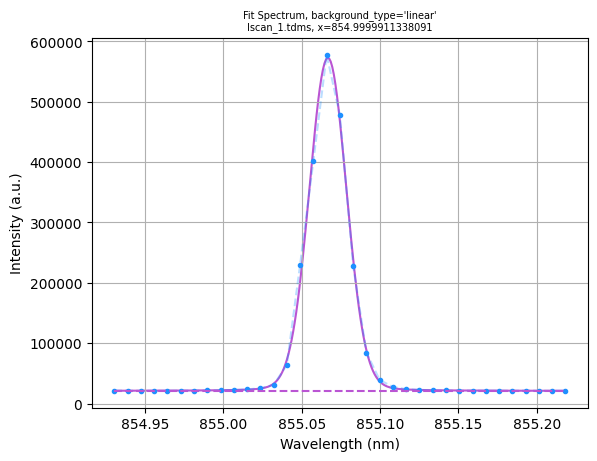

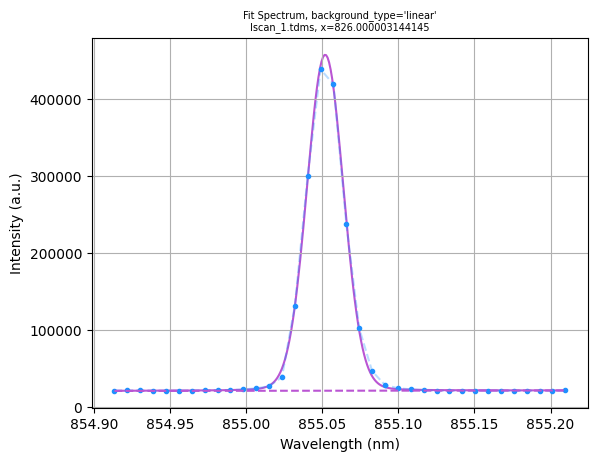

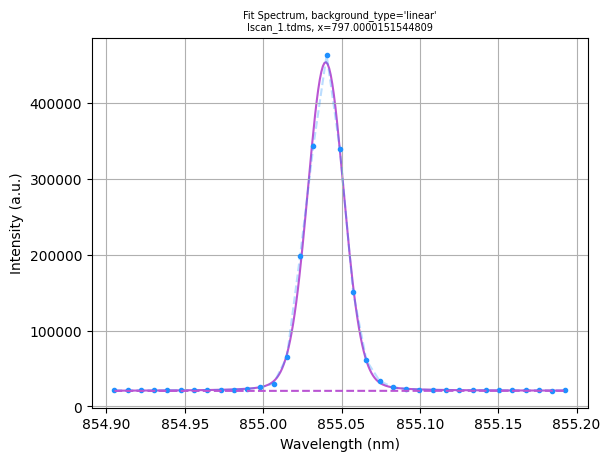

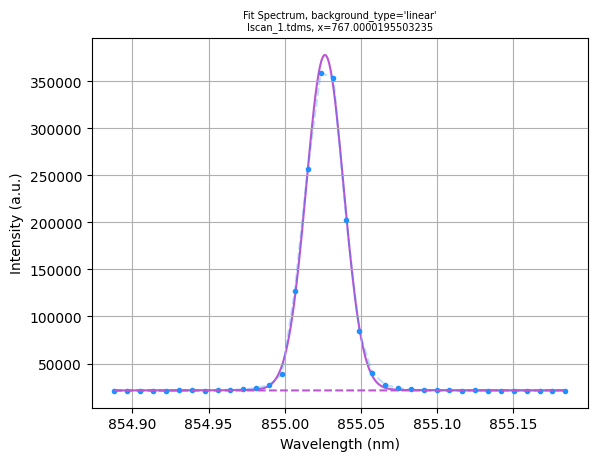

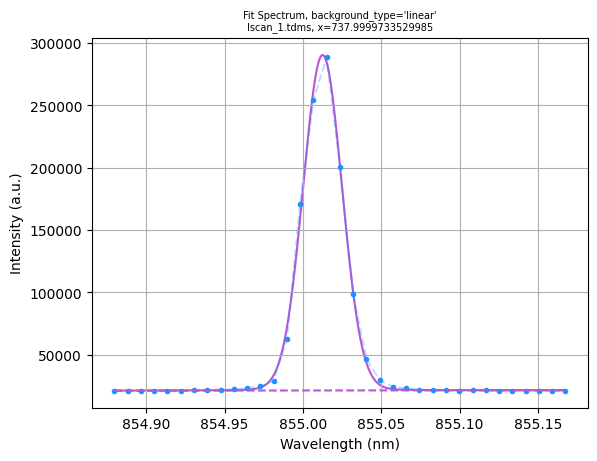

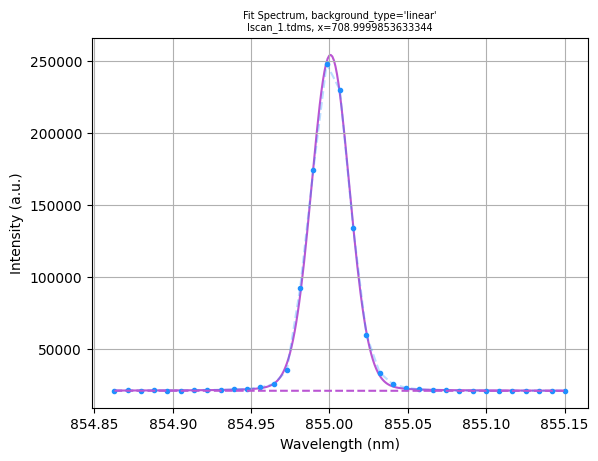

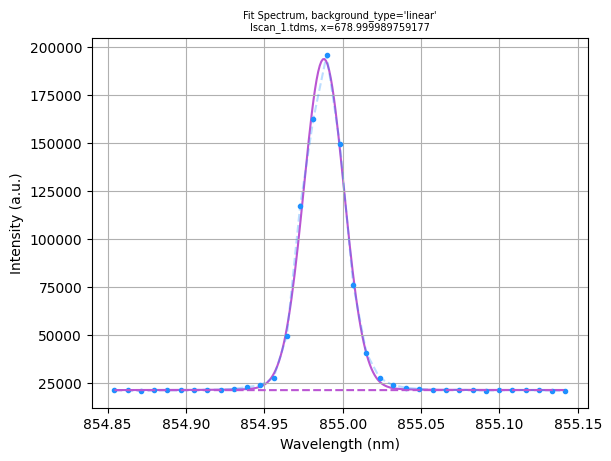

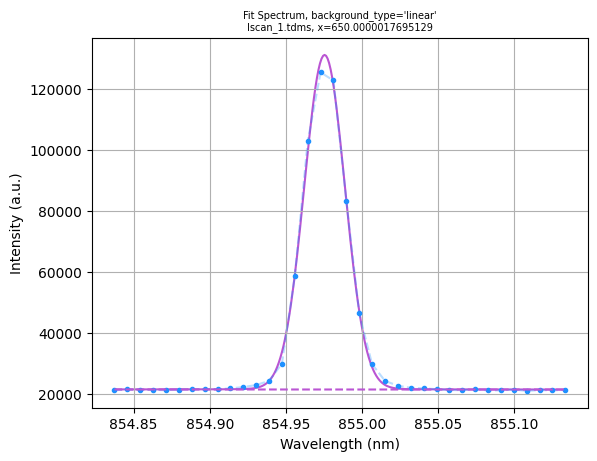

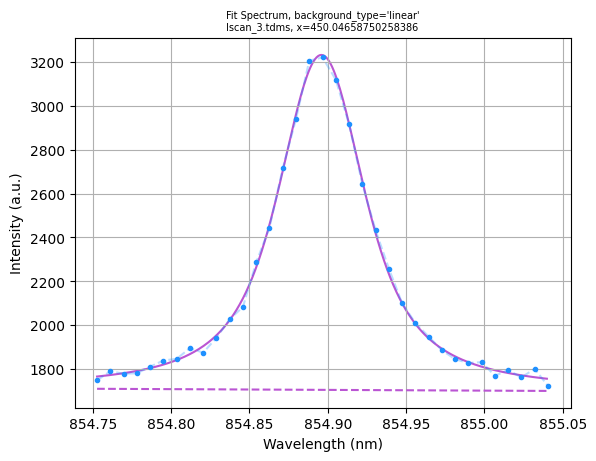

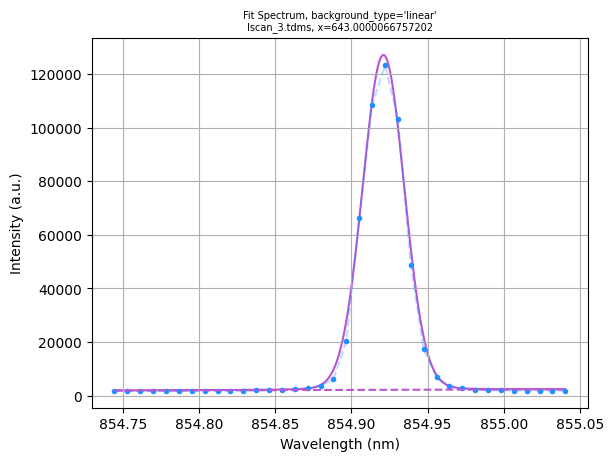

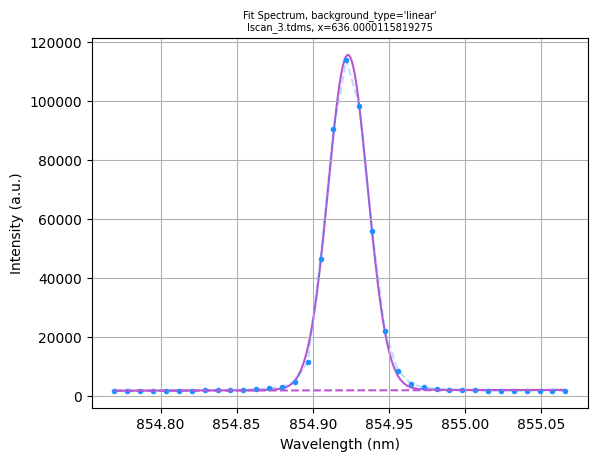

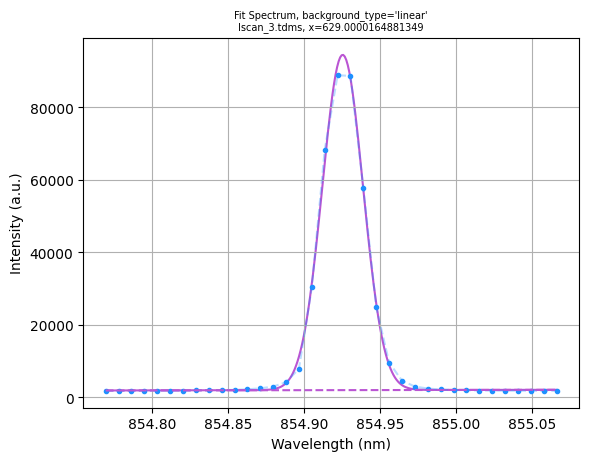

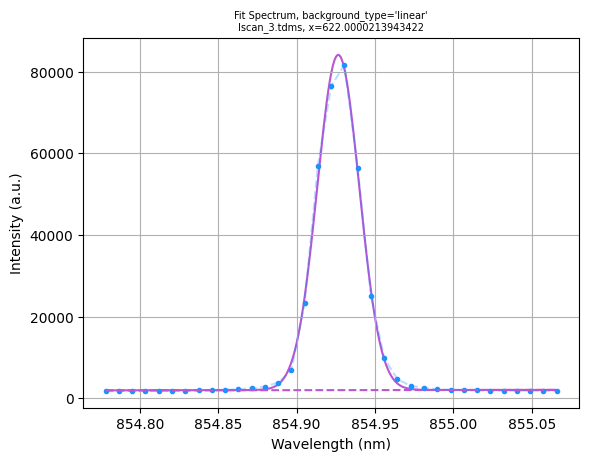

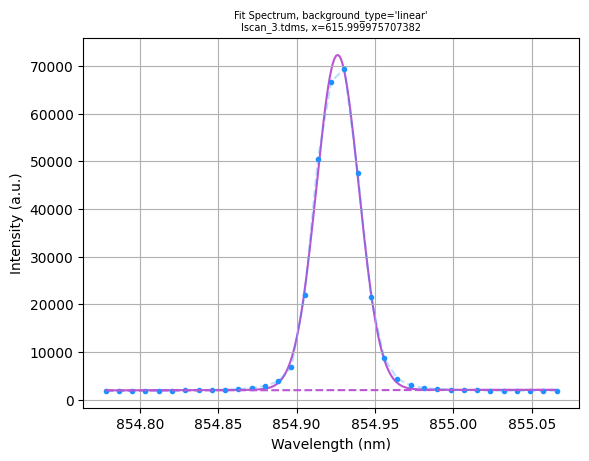

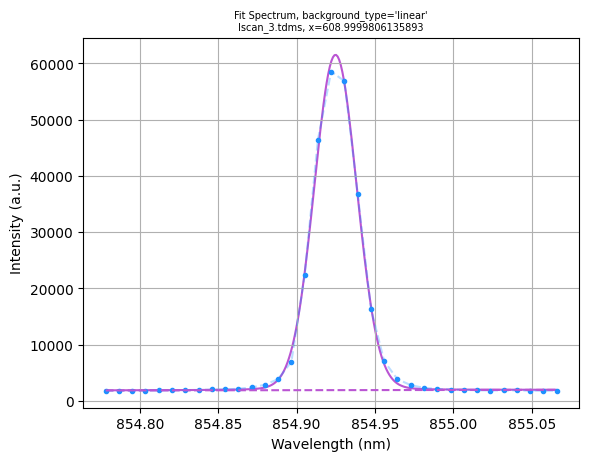

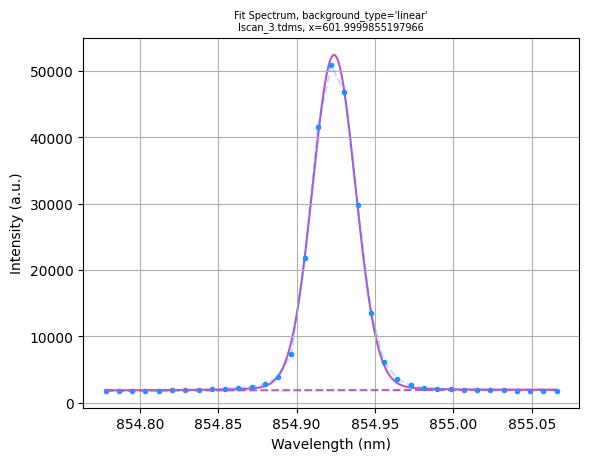

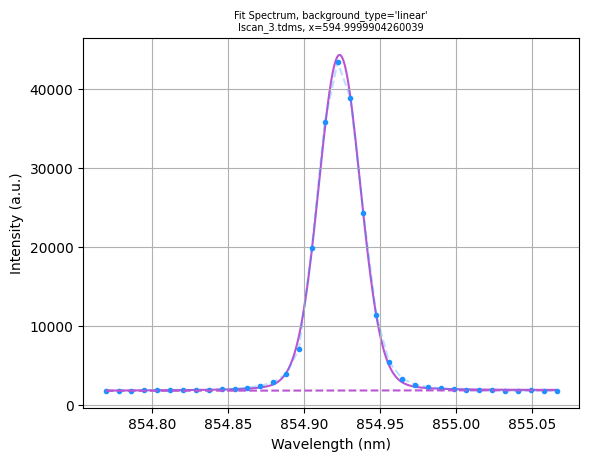

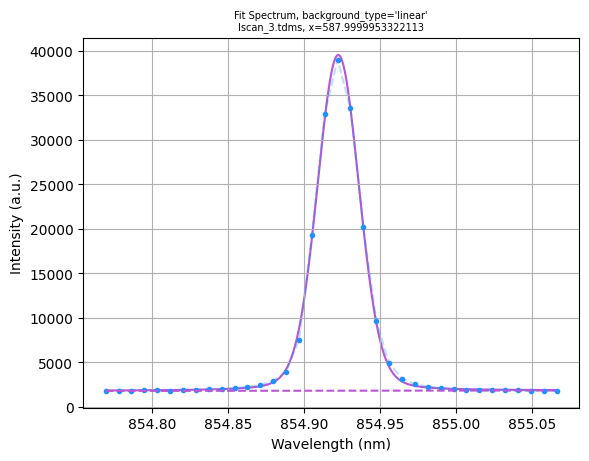

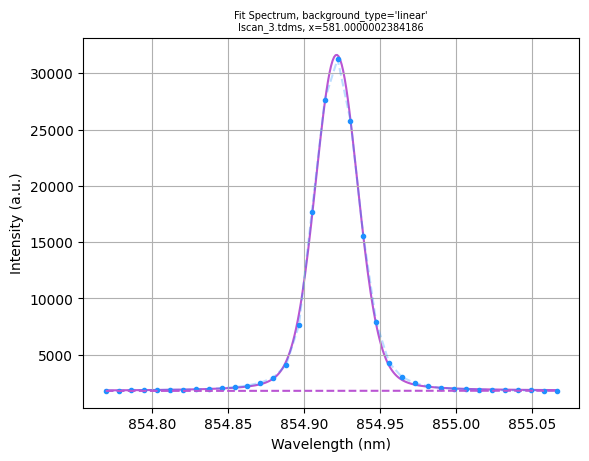

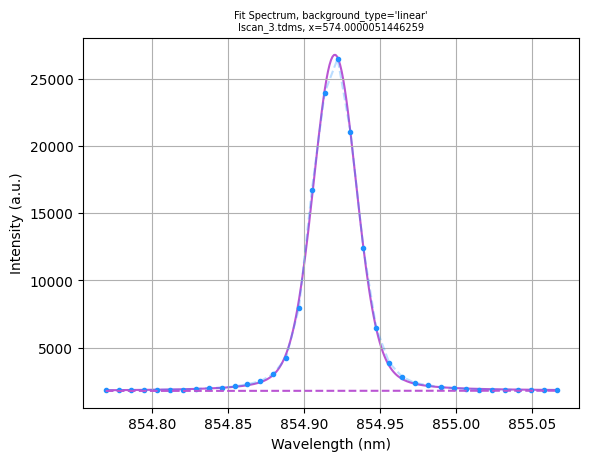

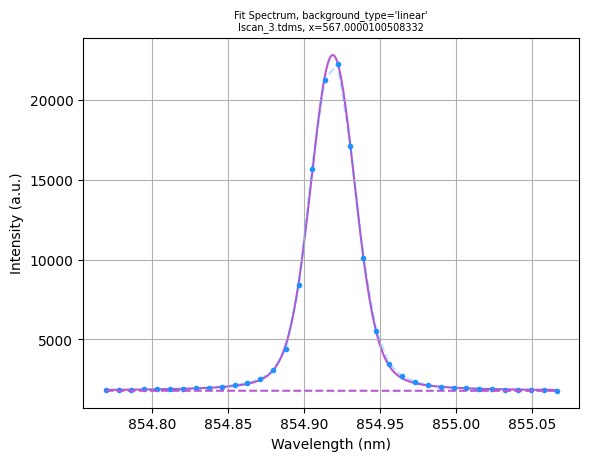

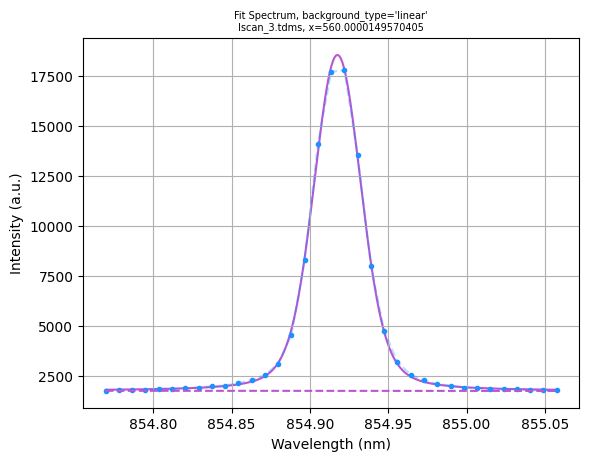

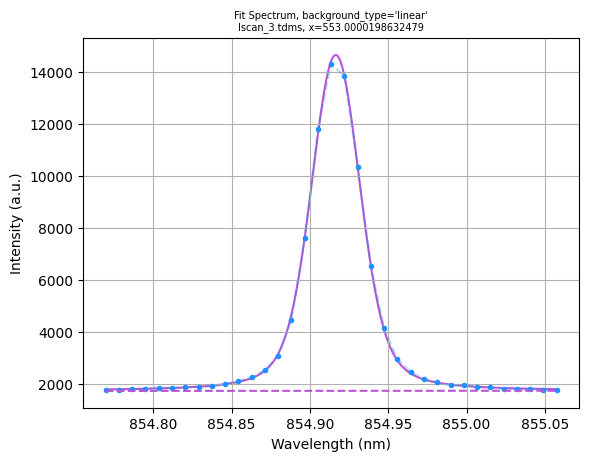

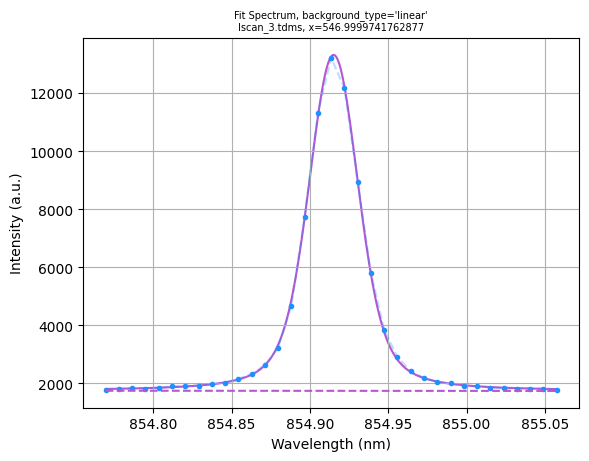

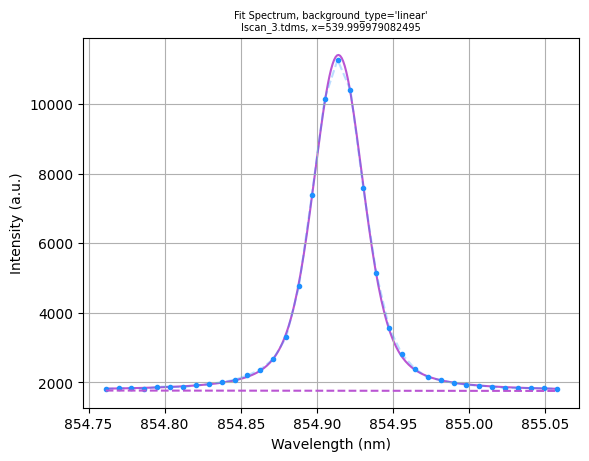

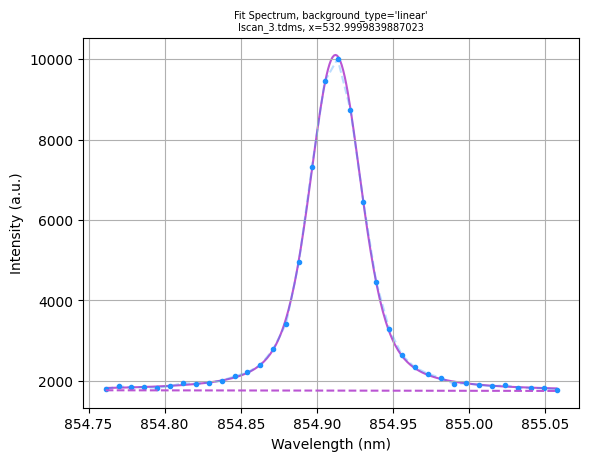

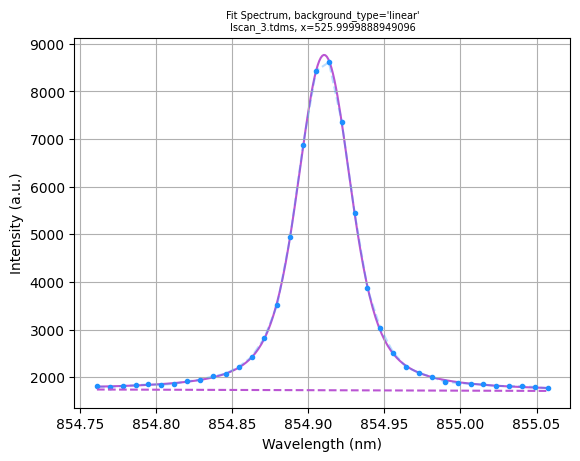

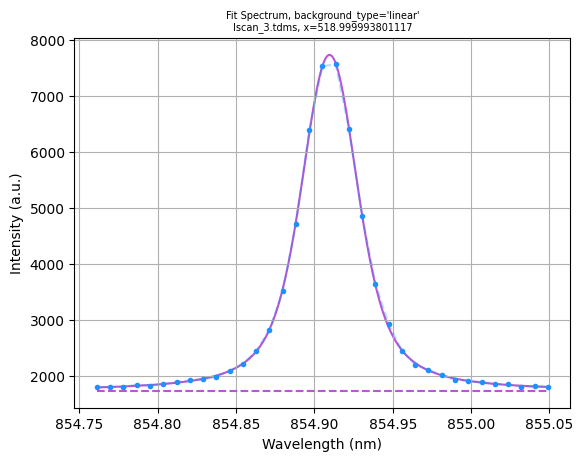

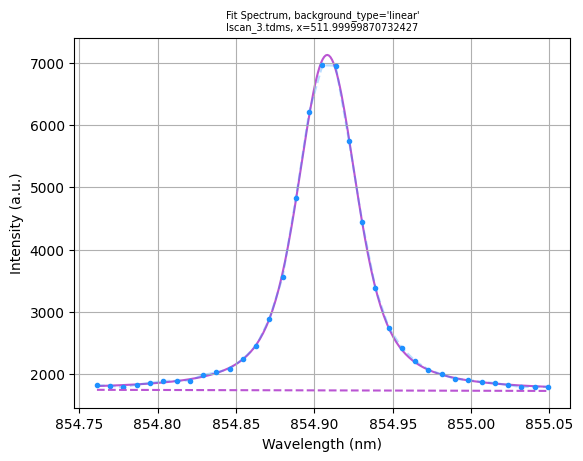

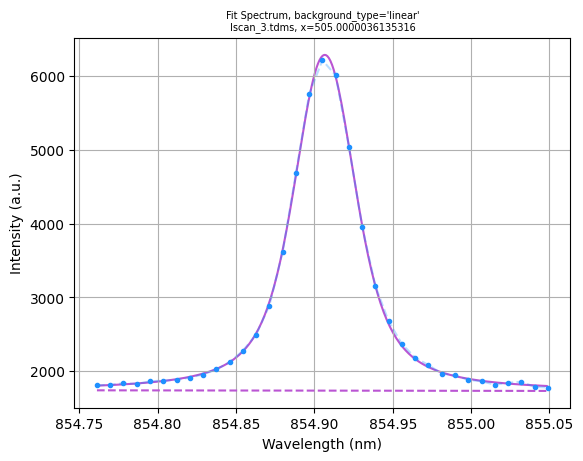

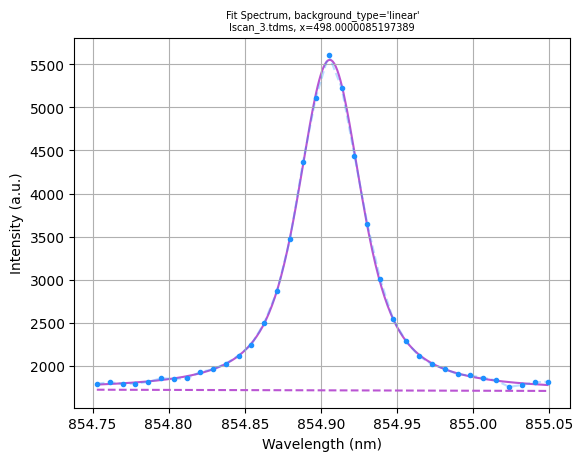

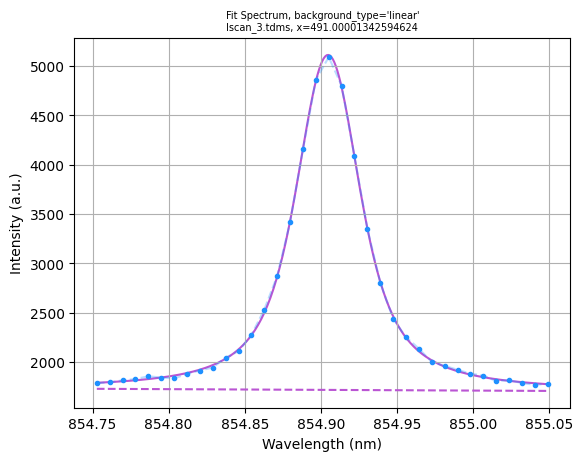

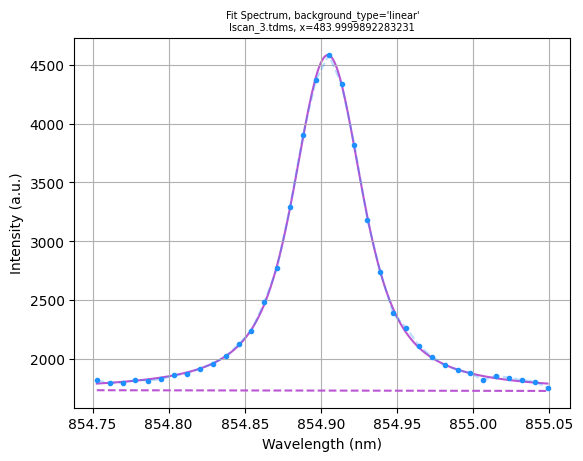

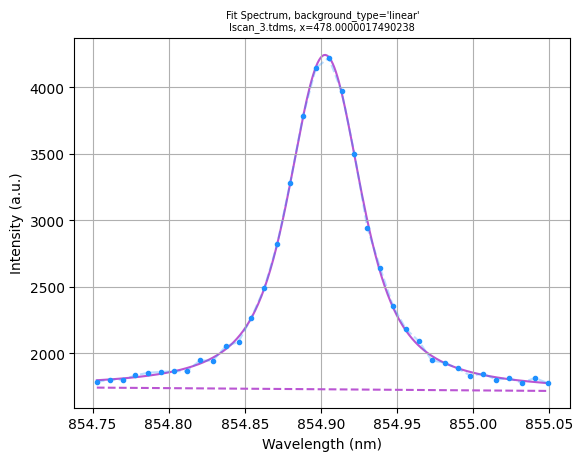

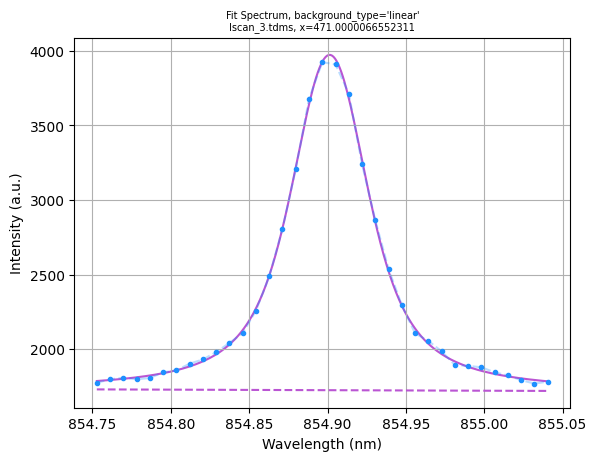

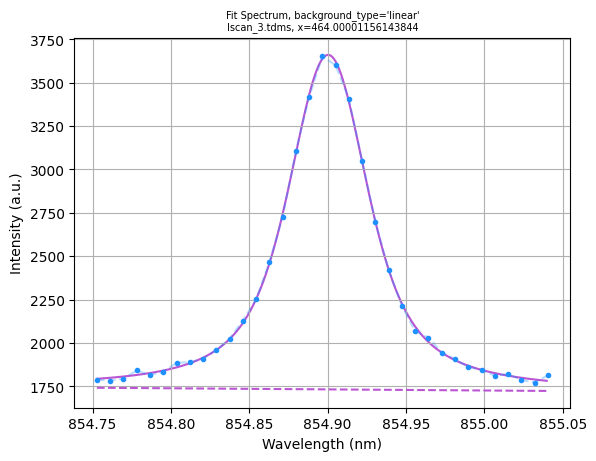

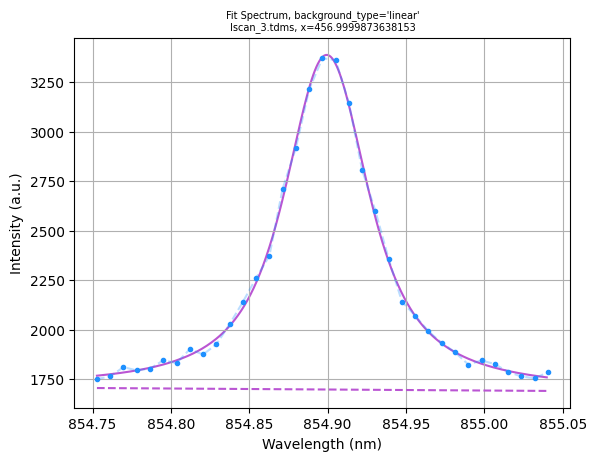

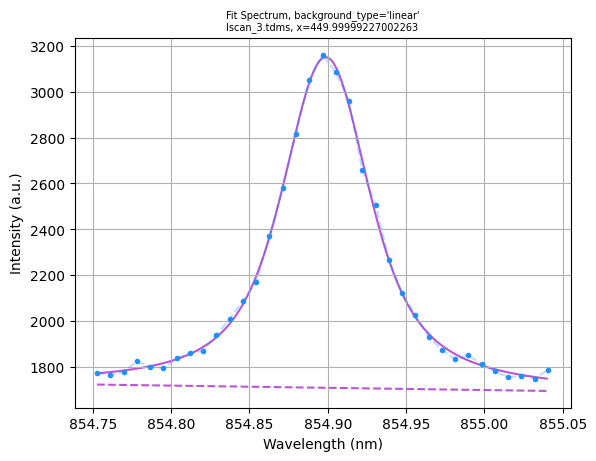

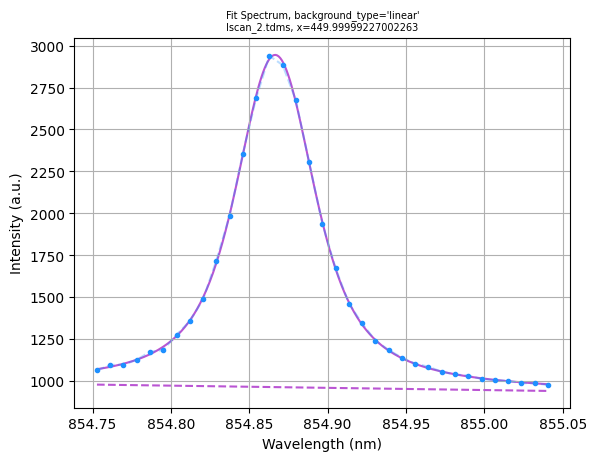

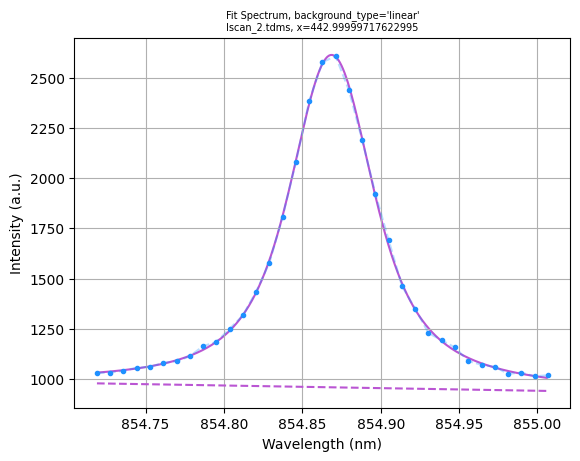

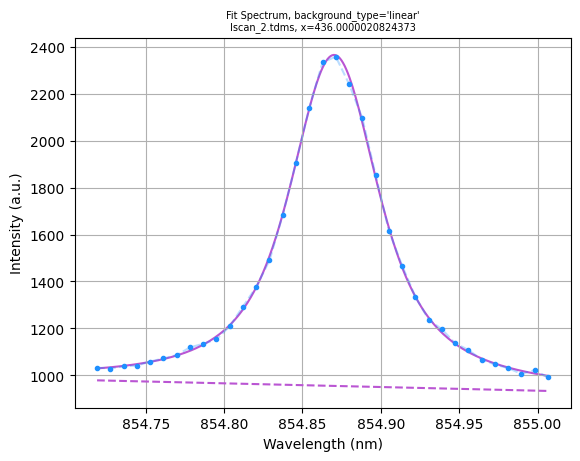

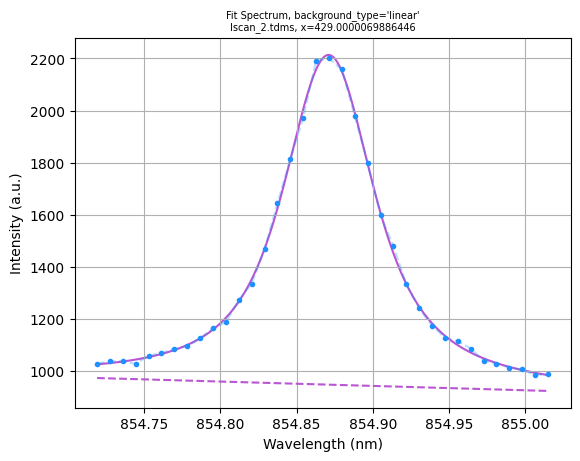

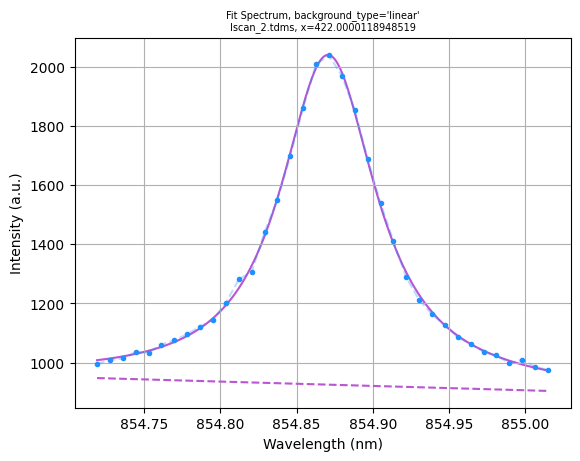

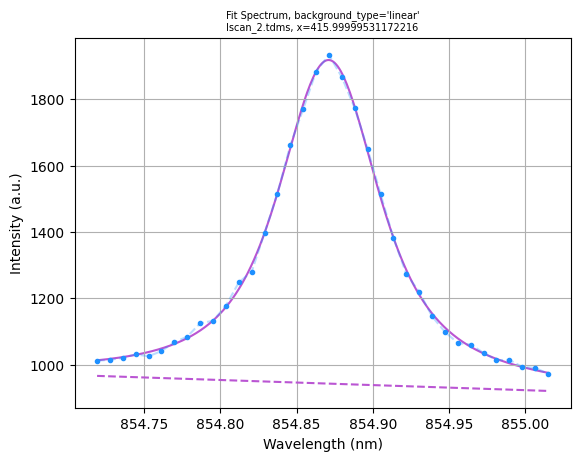

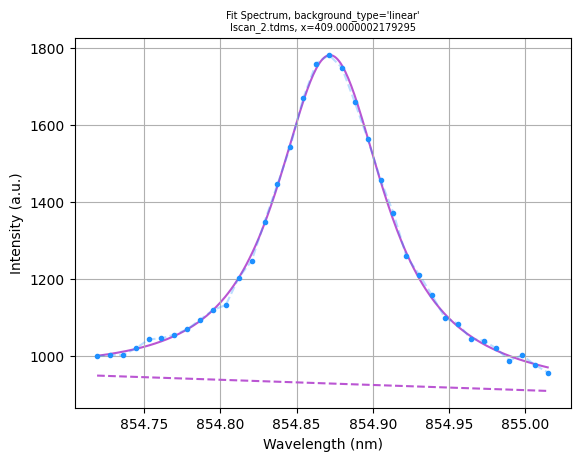

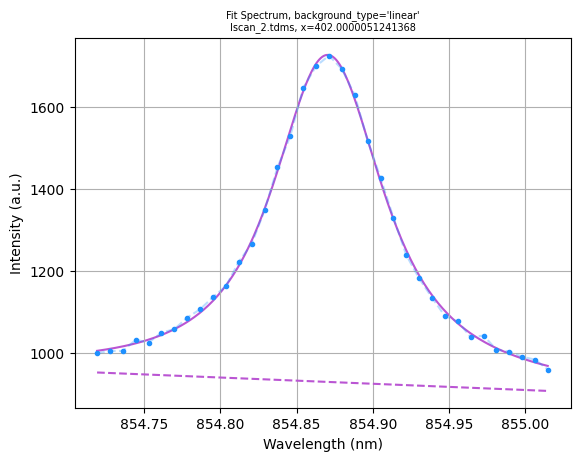

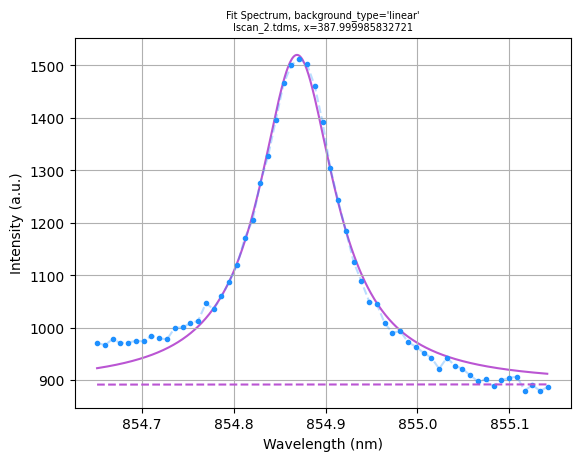

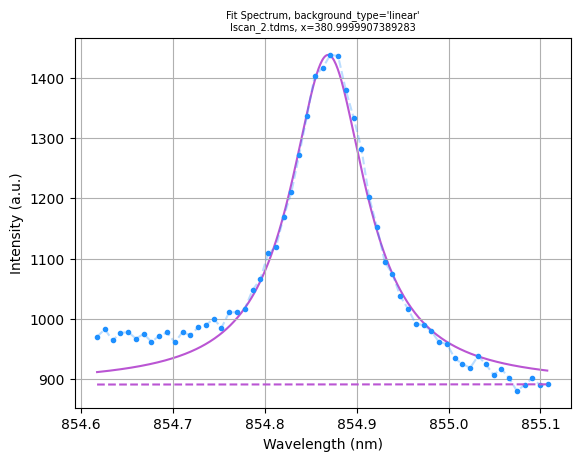

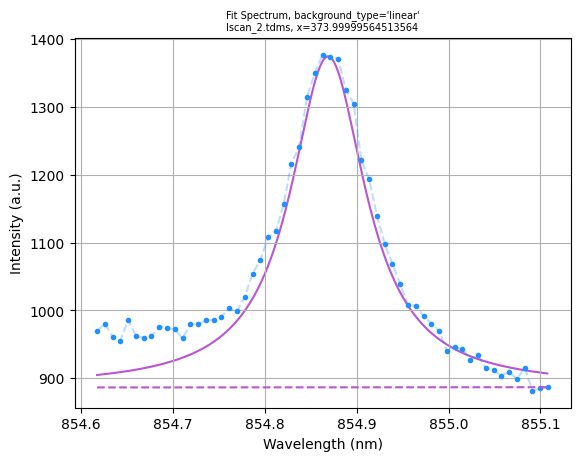

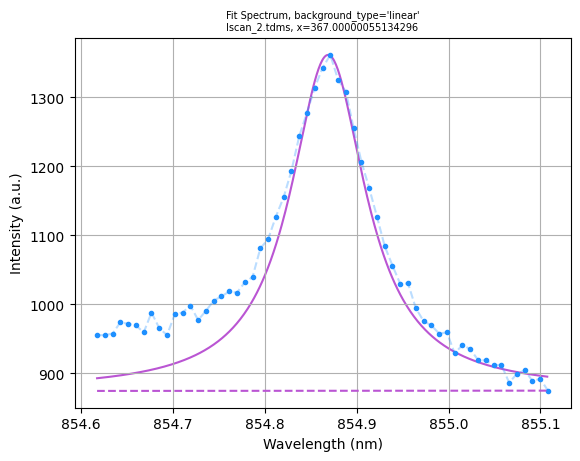

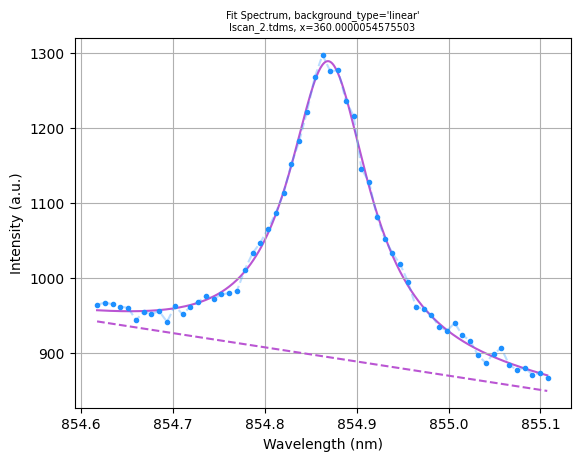

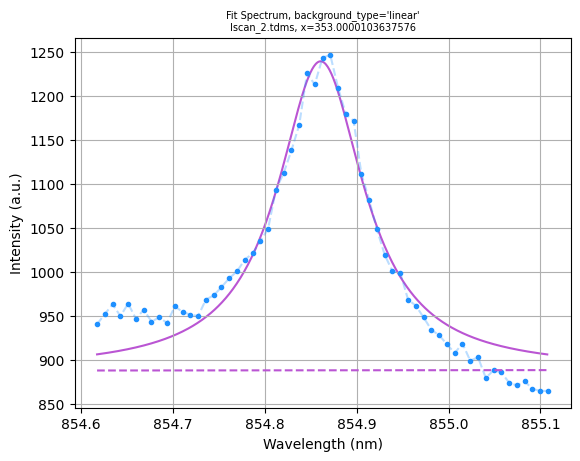

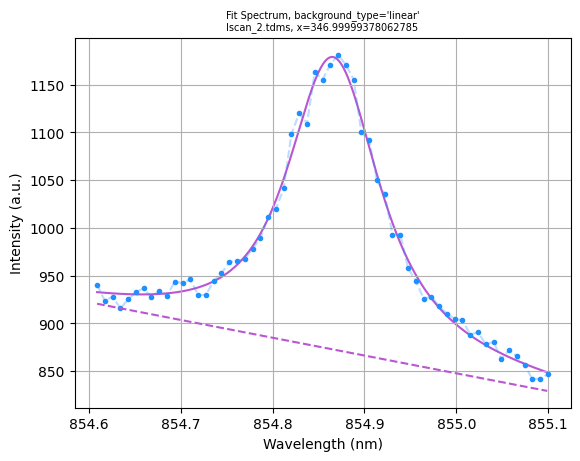

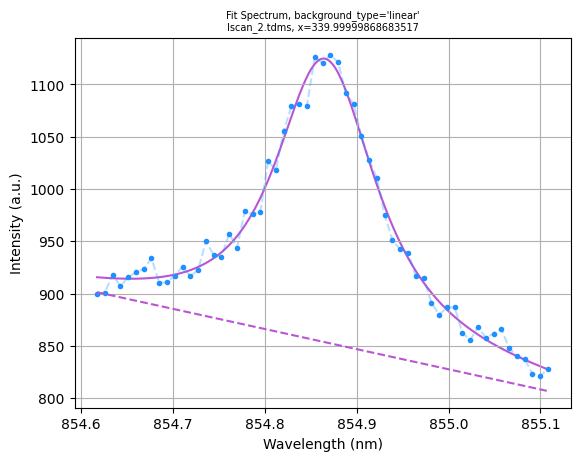

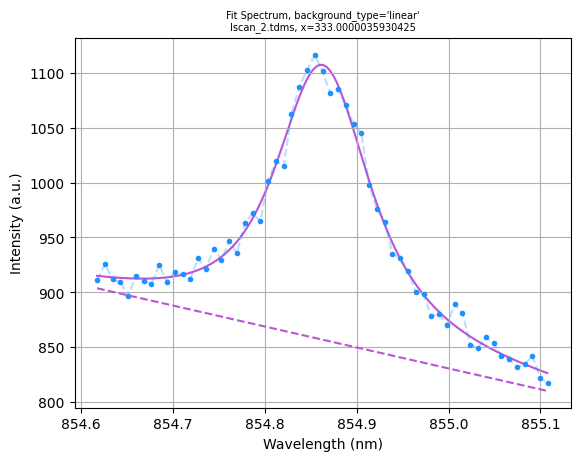

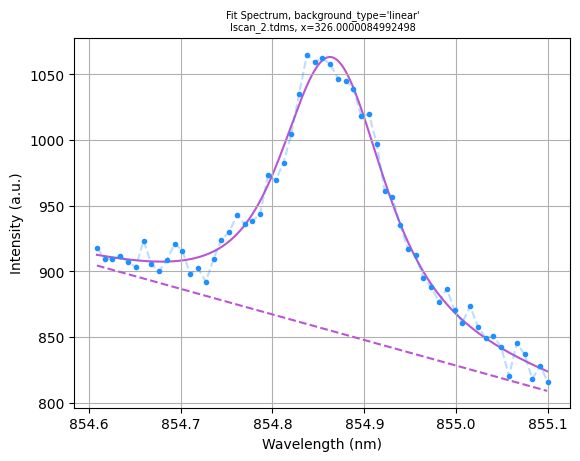

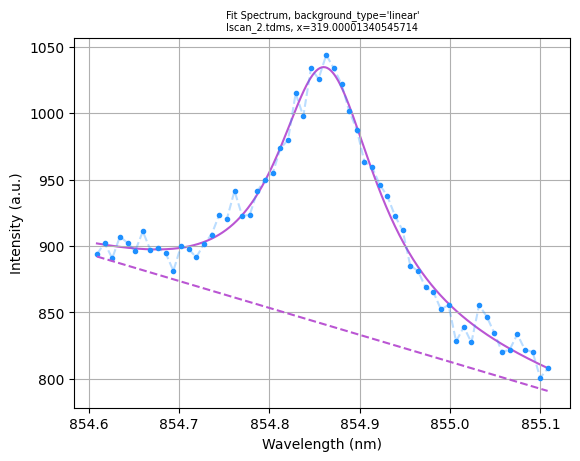

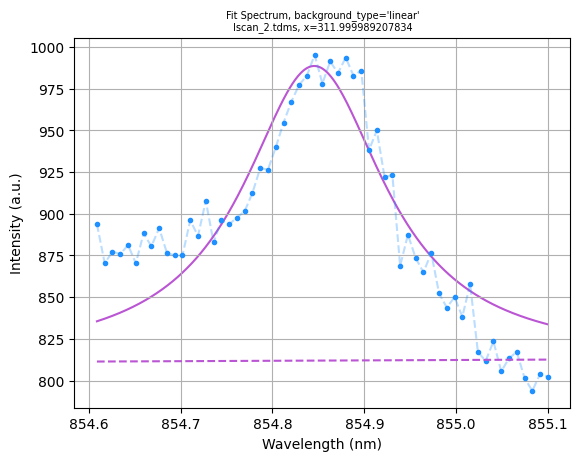

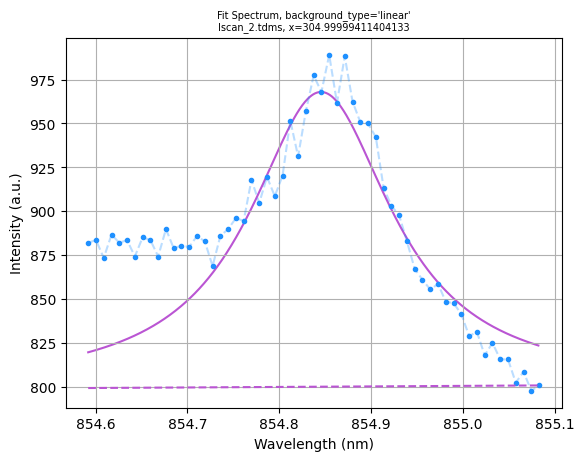

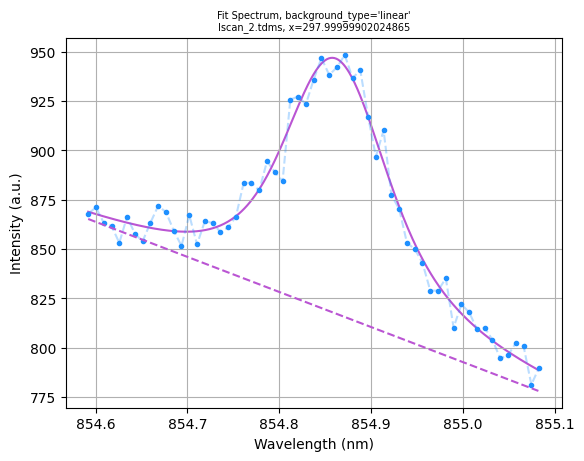

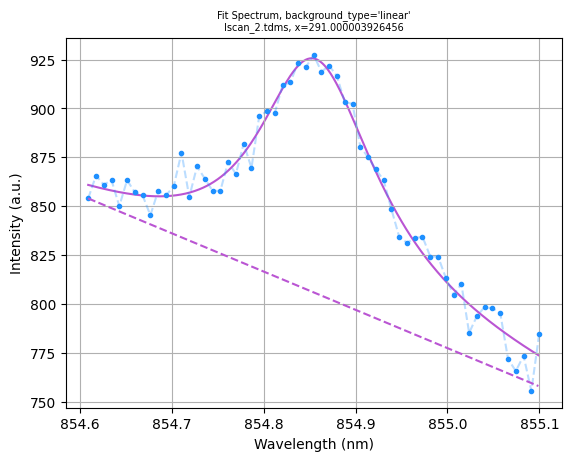

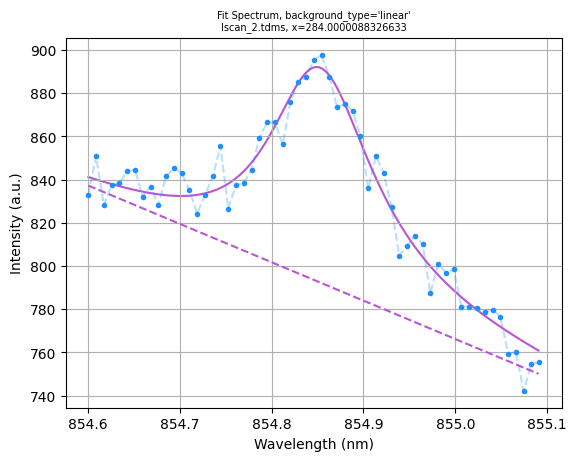

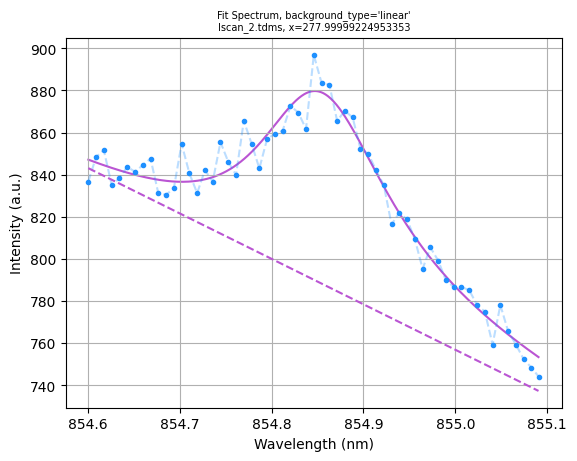

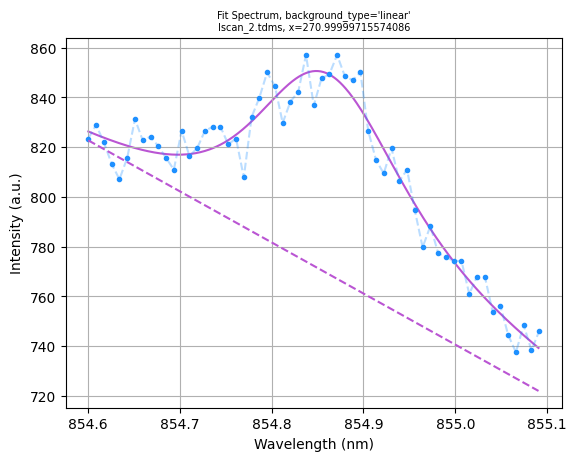

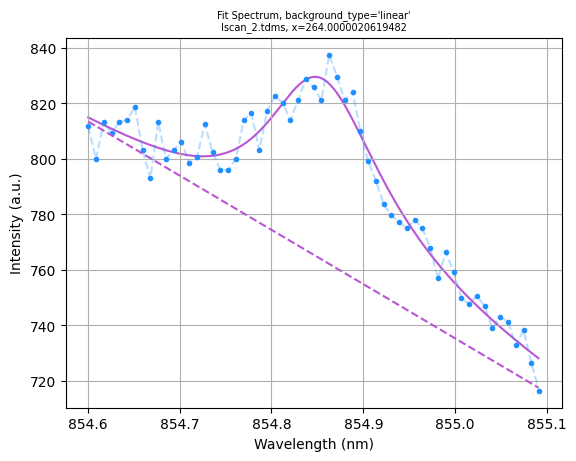

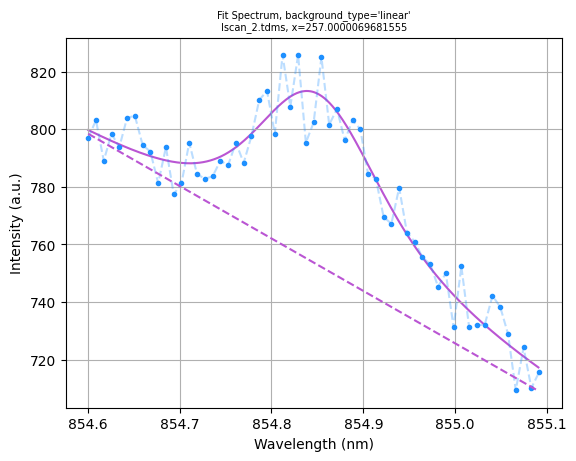

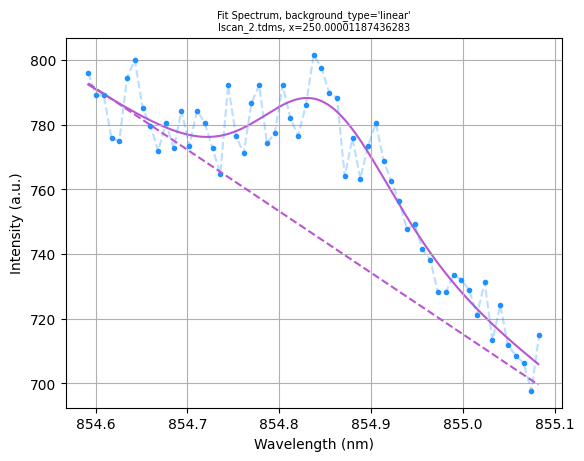

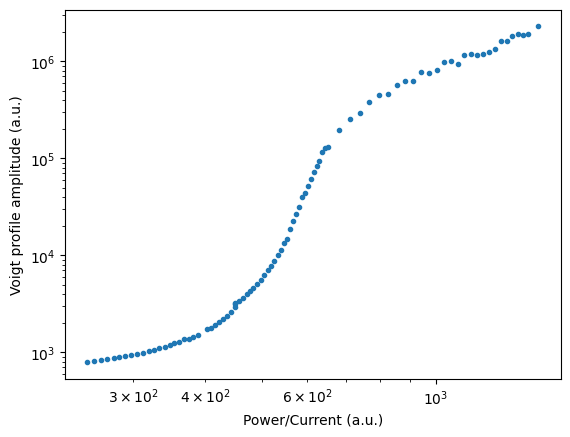

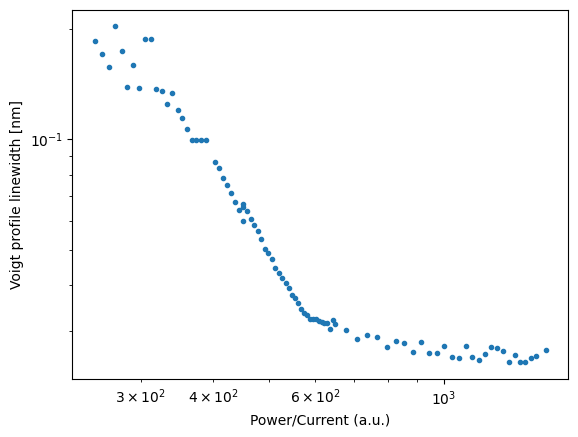

In [4]:
# load Series
FILEPATHS = ['series/Iscan_1.tdms', 'series/Iscan_2.tdms', 'series/Iscan_3.tdms']
series = Series(FILEPATHS, stitch=False)

# manual stitching
OD, exposure_time = 2, 3
series.series[0].scale_intensity(10**(OD))
series.series[0].scale_intensity(1/exposure_time)
OD, exposure_time = 0.45, 1.5
series.series[1].scale_intensity(10**(OD))
series.series[1].scale_intensity(1/exposure_time)
OD, exposure_time = 0, 1.28
series.series[2].scale_intensity(10**(OD))
series.series[2].scale_intensity(1/exposure_time)

# plot Series
series.plot()

# fit with Voigt profile 
plot_each_fit = True
series.fit(lambda0_guess = 855.2, x_min = 645, delta_lambda = .3, plot = plot_each_fit)
series.fit(lambda0_guess = 854.9, x_min = 400, x_max = 645, delta_lambda = .3, plot = plot_each_fit)
series.fit(lambda0_guess = 854.9, x_min = 1, x_max = 400, delta_lambda = .5, plot = plot_each_fit)

# plot fit results
df_fits = series.get_fit_results()
plt.figure()
plt.loglog(df_fits['x'], df_fits['a'], '.')
plt.xlabel('Power/Current (a.u.)')
plt.ylabel('Voigt profile amplitude (a.u.)')

plt.figure()
plt.loglog(df_fits['x'], df_fits['f_v'], '.')
plt.xlabel('Power/Current (a.u.)')
plt.ylabel('Voigt profile linewidth [nm]')